### This Jupyter Notebook contains all the figures from Beaufort Sea. It also contains the calculations of standard deviations from NASA Team and Bootstrap data

#### import all the necessary libraries

In [1]:
import netCDF4 as nc
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

#### NOAA Dataset Standard Deviation calculation

In [2]:
def calculate_std(num_days_in_years, dataset_base_name="beaufort_noaa_",yshape=26, xshape=25):
    for num_days_in_year, year in num_days_in_years:
        ds1=xr.open_dataset(f'{dataset_base_name}{year}.nc')

        stdev = np.zeros(shape=(num_days_in_year, yshape,xshape))
        stdev_nt = np.zeros(shape=(num_days_in_year, yshape,xshape))
        stdev_bt = np.zeros(shape=(num_days_in_year, yshape,xshape))

        xgrid_1 = ds1['xc']
        ygrid_1 = ds1['yc']
        time_1 = ds1['time']

        stdev = xr.DataArray(stdev,coords=[time_1, ygrid_1, xgrid_1],dims =['time', 'yc', 'xc'])
        stdev[:,:,:] = np.nan
        ds1['standard_deviation'] = stdev
        
        stdev_nt = xr.DataArray(stdev_nt,coords=[time_1, ygrid_1, xgrid_1],dims =['time', 'yc', 'xc'])
        stdev_nt[:,:,:] = np.nan
        ds1['standard_deviation_nt'] = stdev_nt
        
        stdev_bt = xr.DataArray(stdev_bt,coords=[time_1, ygrid_1, xgrid_1],dims =['time', 'yc', 'xc'])
        stdev_bt[:,:,:] = np.nan
        ds1['standard_deviation_bt'] = stdev_bt

        for day in np.arange(num_days_in_year):
            #print(f"Calculating std for day {day} in year: {year}")
            stack = np.stack([ds1['nsidc_nt_seaice_conc'][day], ds1['nsidc_bt_seaice_conc'][day]], axis=0)
            stack_arr = xr.DataArray(stack,coords=[[0,1], ygrid_1, xgrid_1],dims =["layer", 'yc', 'xc'])
            rolling = stack_arr.rolling(dim={"layer": 2, "yc": 3, "xc": 3},center=True)
            rolling_std = rolling.std(skipna=True)[1]
            ds1['standard_deviation'][day] = rolling_std
            
            stack_arr_bt = xr.DataArray(ds1['nsidc_bt_seaice_conc'][day],coords=[ygrid_1, xgrid_1],dims =['yc', 'xc'])
            rolling_bt = stack_arr_bt.rolling(dim={"yc": 3, "xc": 3},center=True)
            rolling_std_bt = rolling_bt.std(skipna=True)
            ds1['standard_deviation_bt'][day] = rolling_std_bt
            
            stack_arr_nt = xr.DataArray(ds1['nsidc_nt_seaice_conc'][day],coords=[ygrid_1, xgrid_1],dims =['yc', 'xc'])
            rolling_nt = stack_arr_nt.rolling(dim={"yc": 3, "xc": 3},center=True)
            rolling_std_nt = rolling_nt.std(skipna=True)
            ds1['standard_deviation_nt'][day] = rolling_std_nt

        ds1.to_netcdf(f'{dataset_base_name}{year}_sd__.nc')

In [ ]:
_num_days_in_years = [(365,'1979'),(366, '1980'), (365, '1981'),(365, '1982'),(365, '1983'),(366, '1984'),(365, '1985'),(365, '1986'),(365, '1987'),(366, '1988'),(365, '1989'),(365, '1990'),(365, '1991'),(366, '1992'),(365, '1993'),(365, '1994'),(365, '1995'),(366, '1996'),(365, '1997'),(365, '1998'),(365, '1999'),(366, '2000'),(365, '2001'),(365, '2002'),(365, '2003'),(366, '2004'),(365, '2005'),(365, '2006'),(365, '2007'),(366, '2008'),(365, '2009'),(365, '2010'),(365, '2011'),(366, '2012'),(365, '2013'),(365, '2014'),(365, '2015'),(366, '2016'),(365, '2017'),(365, '2018'),(365, '2019'),(366, '2020'),(365, '2021'),(365, '2022')]
calculate_std(_num_days_in_years,yshape=26, xshape=25)

#### OSI-SAF Dataset Standard Deviation calculation

In [ ]:
def calculate_std(num_days_in_years, dataset_base_name="beaufort_osi_",yshape=26, xshape=25):
    for num_days_in_year, year in num_days_in_years:
        ds1=xr.open_dataset(f'{dataset_base_name}{year}.nc')
        stdev = np.zeros(shape=(num_days_in_year, yshape,xshape))

        stdev_osi = np.zeros(shape=(num_days_in_year, yshape,xshape))

        xgrid_1 = ds1['xc']
        ygrid_1 = ds1['yc']
        time_1 = ds1['time']

        stdev = xr.DataArray(stdev,coords=[time_1, ygrid_1, xgrid_1],dims =['time', 'yc', 'xc'])
        stdev[:,:,:] = np.nan
        ds1['standard_deviation'] = stdev
        
        stdev_osi = xr.DataArray(stdev_osi,coords=[time_1, ygrid_1, xgrid_1],dims =['time', 'yc', 'xc'])
        stdev_osi[:,:,:] = np.nan
        ds1['standard_deviation_osi'] = stdev_osi

        for day in np.arange(num_days_in_year):
            stack_arr_osi = xr.DataArray(ds1['ice_conc'][day],coords=[ygrid_1, xgrid_1],dims =['yc', 'xc'])
            rolling_osi = stack_arr_osi.rolling(dim={"yc": 3, "xc": 3},center=True)
            rolling_std_osi = rolling_osi.std(skipna=True)
            ds1['standard_deviation_osi'][day] = rolling_std_osi

        ds1.to_netcdf(f'{dataset_base_name}{year}_sd__.nc')

In [ ]:
_num_days_in_years = [(179,'1979'),(172, '1980'), (180, '1981'),(177, '1982'),(183, '1983'),(177, '1984'),(179, '1985'),(138, '1986'),(230, '1987'),(346, '1988'),(359, '1989'),(351, '1990'),(365, '1991'),(366, '1992'),(365, '1993'),(365, '1994'),(365, '1995'),(366, '1996'),(365, '1997'),(365, '1998'),(365, '1999'),(365, '2000'),(365, '2001'),(365, '2002'),(365, '2003'),(366, '2004'),(365, '2005'),(365, '2006'),(365, '2007'),(366, '2008'),(365, '2009'),(365, '2010'),(365, '2011'),(366, '2012'),(365, '2013'),(365, '2014'),(365, '2015'),(366, '2016'),(365, '2017'),(365, '2018'),(365, '2019'),(366, '2020'),(363, '2021'),(364, '2022')]
calculate_std(_num_days_in_years, yshape=26, xshape=25)

#### Load all the new netCDF files created by the previous functions

In [15]:
noaa1979=xr.open_dataset('beaufort_noaa_1979_sd__.nc')
noaa1980=xr.open_dataset('beaufort_noaa_1980_sd__.nc')
noaa1981=xr.open_dataset('beaufort_noaa_1981_sd__.nc')
noaa1982=xr.open_dataset('beaufort_noaa_1982_sd__.nc')
noaa1983=xr.open_dataset('beaufort_noaa_1983_sd__.nc')
noaa1984=xr.open_dataset('beaufort_noaa_1984_sd__.nc')
noaa1985=xr.open_dataset('beaufort_noaa_1985_sd__.nc')
noaa1986=xr.open_dataset('beaufort_noaa_1986_sd__.nc')
noaa1987=xr.open_dataset('beaufort_noaa_1987_sd__.nc')
noaa1988=xr.open_dataset('beaufort_noaa_1988_sd__.nc')
noaa1989=xr.open_dataset('beaufort_noaa_1989_sd__.nc')
noaa1990=xr.open_dataset('beaufort_noaa_1990_sd__.nc')
noaa1991=xr.open_dataset('beaufort_noaa_1991_sd__.nc')
noaa1992=xr.open_dataset('beaufort_noaa_1992_sd__.nc')
noaa1993=xr.open_dataset('beaufort_noaa_1993_sd__.nc')
noaa1994=xr.open_dataset('beaufort_noaa_1994_sd__.nc')
noaa1995=xr.open_dataset('beaufort_noaa_1995_sd__.nc')
noaa1996=xr.open_dataset('beaufort_noaa_1996_sd__.nc')
noaa1997=xr.open_dataset('beaufort_noaa_1997_sd__.nc')
noaa1998=xr.open_dataset('beaufort_noaa_1998_sd__.nc')
noaa1999=xr.open_dataset('beaufort_noaa_1999_sd__.nc')
noaa2000=xr.open_dataset('beaufort_noaa_2000_sd__.nc')
noaa2001=xr.open_dataset('beaufort_noaa_2001_sd__.nc')
noaa2002=xr.open_dataset('beaufort_noaa_2002_sd__.nc')
noaa2003=xr.open_dataset('beaufort_noaa_2003_sd__.nc')
noaa2004=xr.open_dataset('beaufort_noaa_2004_sd__.nc')
noaa2005=xr.open_dataset('beaufort_noaa_2005_sd__.nc')
noaa2006=xr.open_dataset('beaufort_noaa_2006_sd__.nc')
noaa2007=xr.open_dataset('beaufort_noaa_2007_sd__.nc')
noaa2008=xr.open_dataset('beaufort_noaa_2008_sd__.nc')
noaa2009=xr.open_dataset('beaufort_noaa_2009_sd__.nc')
noaa2010=xr.open_dataset('beaufort_noaa_2010_sd__.nc')
noaa2011=xr.open_dataset('beaufort_noaa_2011_sd__.nc')
noaa2012=xr.open_dataset('beaufort_noaa_2012_sd__.nc')
noaa2013=xr.open_dataset('beaufort_noaa_2013_sd__.nc')
noaa2014=xr.open_dataset('beaufort_noaa_2014_sd__.nc')
noaa2015=xr.open_dataset('beaufort_noaa_2015_sd__.nc')
noaa2016=xr.open_dataset('beaufort_noaa_2016_sd__.nc')
noaa2017=xr.open_dataset('beaufort_noaa_2017_sd__.nc')
noaa2018=xr.open_dataset('beaufort_noaa_2018_sd__.nc')
noaa2019=xr.open_dataset('beaufort_noaa_2019_sd__.nc')
noaa2020=xr.open_dataset('beaufort_noaa_2020_sd__.nc')
noaa2021=xr.open_dataset('beaufort_noaa_2021_sd__.nc')
noaa2022=xr.open_dataset('beaufort_noaa_2022_sd__.nc')

osi1979=xr.open_dataset('beaufort_osi_1979_sd__.nc')
osi1980=xr.open_dataset('beaufort_osi_1980_sd__.nc')
osi1981=xr.open_dataset('beaufort_osi_1981_sd__.nc')
osi1982=xr.open_dataset('beaufort_osi_1982_sd__.nc')
osi1983=xr.open_dataset('beaufort_osi_1983_sd__.nc')
osi1984=xr.open_dataset('beaufort_osi_1984_sd__.nc')
osi1985=xr.open_dataset('beaufort_osi_1985_sd__.nc')
osi1986=xr.open_dataset('beaufort_osi_1986_sd__.nc')
osi1987=xr.open_dataset('beaufort_osi_1987_sd__.nc')
osi1988=xr.open_dataset('beaufort_osi_1988_sd__.nc')
osi1989=xr.open_dataset('beaufort_osi_1989_sd__.nc')
osi1990=xr.open_dataset('beaufort_osi_1990_sd__.nc')
osi1991=xr.open_dataset('beaufort_osi_1991_sd__.nc')
osi1992=xr.open_dataset('beaufort_osi_1992_sd__.nc')
osi1993=xr.open_dataset('beaufort_osi_1993_sd__.nc')
osi1994=xr.open_dataset('beaufort_osi_1994_sd__.nc')
osi1995=xr.open_dataset('beaufort_osi_1995_sd__.nc')
osi1996=xr.open_dataset('beaufort_osi_1996_sd__.nc')
osi1997=xr.open_dataset('beaufort_osi_1997_sd__.nc')
osi1998=xr.open_dataset('beaufort_osi_1998_sd__.nc')
osi1999=xr.open_dataset('beaufort_osi_1999_sd__.nc')
osi2000=xr.open_dataset('beaufort_osi_2000_sd__.nc')
osi2001=xr.open_dataset('beaufort_osi_2001_sd__.nc')
osi2002=xr.open_dataset('beaufort_osi_2002_sd__.nc')
osi2003=xr.open_dataset('beaufort_osi_2003_sd__.nc')
osi2004=xr.open_dataset('beaufort_osi_2004_sd__.nc')
osi2005=xr.open_dataset('beaufort_osi_2005_sd__.nc')
osi2006=xr.open_dataset('beaufort_osi_2006_sd__.nc')
osi2007=xr.open_dataset('beaufort_osi_2007_sd__.nc')
osi2008=xr.open_dataset('beaufort_osi_2008_sd__.nc')
osi2009=xr.open_dataset('beaufort_osi_2009_sd__.nc')
osi2010=xr.open_dataset('beaufort_osi_2010_sd__.nc')
osi2011=xr.open_dataset('beaufort_osi_2011_sd__.nc')
osi2012=xr.open_dataset('beaufort_osi_2012_sd__.nc')
osi2013=xr.open_dataset('beaufort_osi_2013_sd__.nc')
osi2014=xr.open_dataset('beaufort_osi_2014_sd__.nc')
osi2015=xr.open_dataset('beaufort_osi_2015_sd__.nc')
osi2016=xr.open_dataset('beaufort_osi_2016_sd__.nc')
osi2017=xr.open_dataset('beaufort_osi_2017_sd__.nc')
osi2018=xr.open_dataset('beaufort_osi_2018_sd__.nc')
osi2019=xr.open_dataset('beaufort_osi_2019_sd__.nc')
osi2020=xr.open_dataset('beaufort_osi_2020_sd__.nc')
osi2021=xr.open_dataset('beaufort_osi_2021_sd__.nc')
osi2022=xr.open_dataset('beaufort_osi_2022_sd__.nc')

#### Plotting the time series of uncertainties and standard deviations for 2020

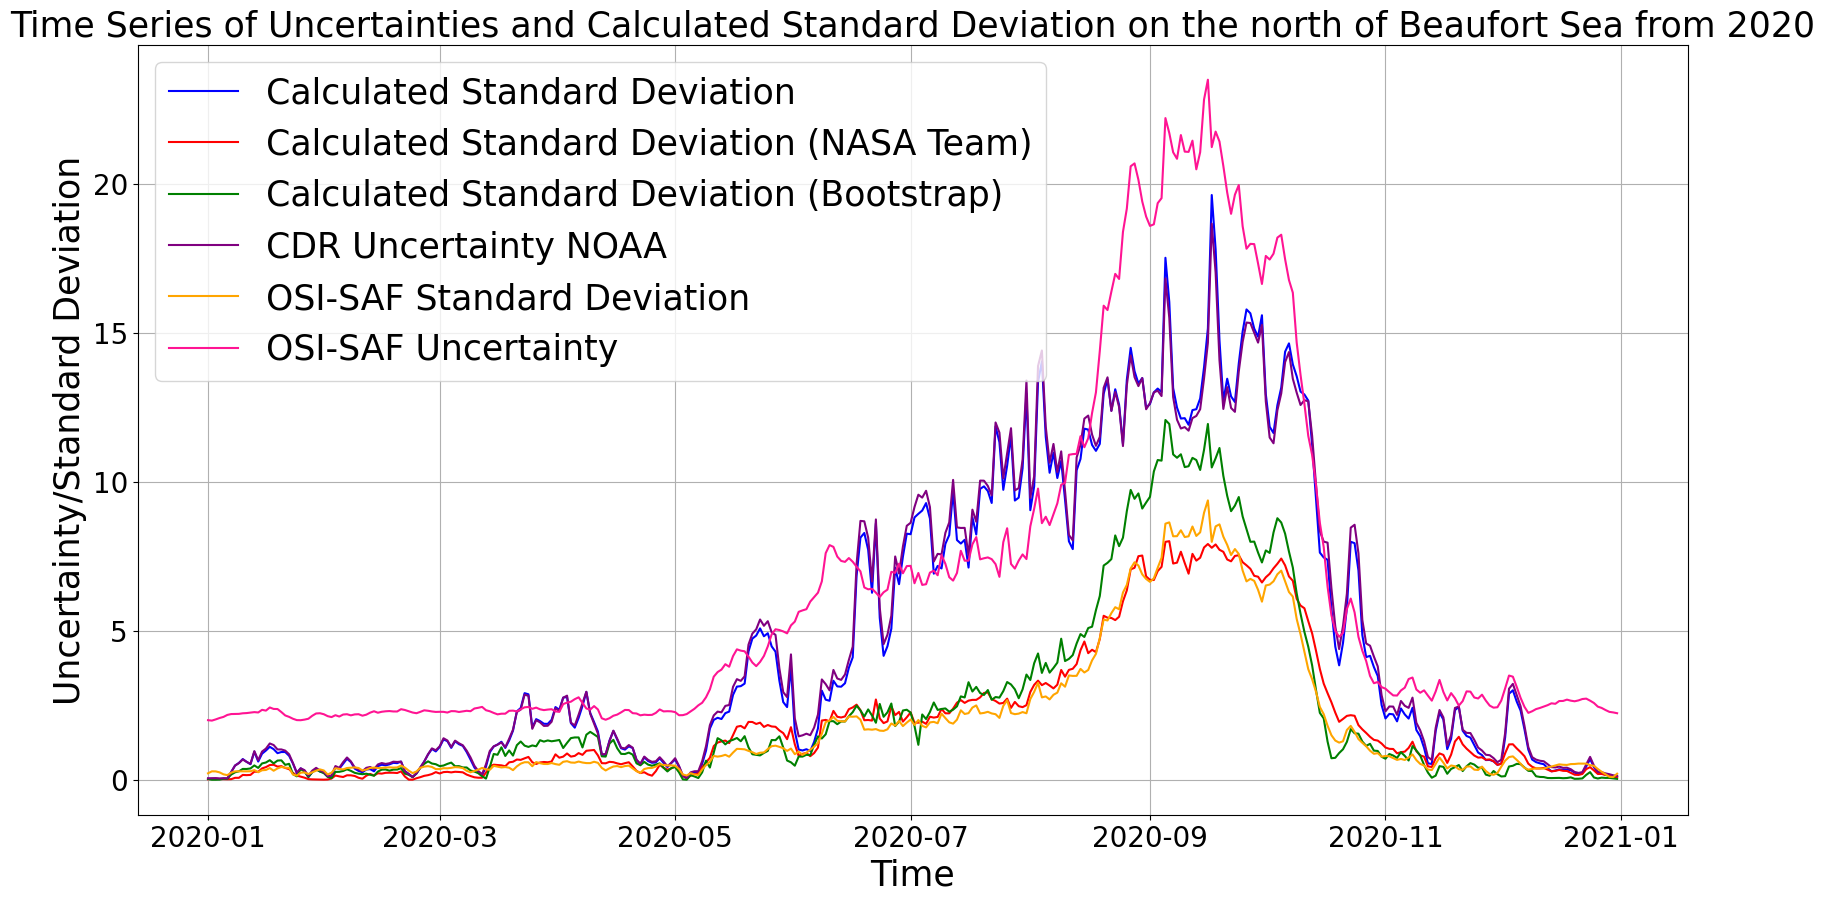

In [5]:
stdev_mean_2020=noaa2020['standard_deviation'].mean(dim='yc')
stdev_mean_2020=stdev_mean_2020.mean(dim='xc')

stdev_mean_nt_2020=noaa2020['standard_deviation_nt'].mean(dim='yc')
stdev_mean_nt_2020=stdev_mean_nt_2020.mean(dim='xc')

stdev_mean_bt_2020=noaa2020['standard_deviation_bt'].mean(dim='yc')
stdev_mean_bt_2020=stdev_mean_bt_2020.mean(dim='xc')

uncertainty_mean_noaa_2020=noaa2020['stdev_of_cdr_seaice_conc'].mean(dim='yc')
uncertainty_mean_noaa_2020=uncertainty_mean_noaa_2020.mean(dim='xc')

stdev_mean_osi_2020=osi2020['standard_deviation_osi'].mean(dim='yc')
stdev_mean_osi_2020=stdev_mean_osi_2020.mean(dim='xc')

uncertainty_mean_osi_2020=osi2020['total_standard_error'].mean(dim='yc')
uncertainty_mean_osi_2020=uncertainty_mean_osi_2020.mean(dim='xc')

time2020=noaa2020['time']


plt.figure(figsize=(20, 10))
plt.plot(time2020, stdev_mean_2020*100, label='Calculated Standard Deviation', color='blue')
plt.plot(time2020, stdev_mean_nt_2020*100, label='Calculated Standard Deviation (NASA Team)', color='red')
plt.plot(time2020, stdev_mean_bt_2020*100, label='Calculated Standard Deviation (Bootstrap)', color='green')
plt.plot(time2020, uncertainty_mean_noaa_2020*100, label='CDR Uncertainty NOAA', color='purple')
plt.plot(time2020[-len(stdev_mean_osi_2020):], stdev_mean_osi_2020, label='OSI-SAF Standard Deviation', color='orange')
plt.plot(time2020[-len(stdev_mean_osi_2020):], uncertainty_mean_osi_2020, label='OSI-SAF Uncertainty', color='deeppink')
plt.xlabel('Time',fontsize=25)
plt.ylabel('Uncertainty/Standard Deviation',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=25,loc='upper left')
plt.title('Time Series of Uncertainties and Calculated Standard Deviation on the north of Beaufort Sea from 2020',fontsize=25)
plt.grid()
#plt.savefig('all_unc_beaufort_2020.png')
plt.show()

#### Zoomed into July 2020

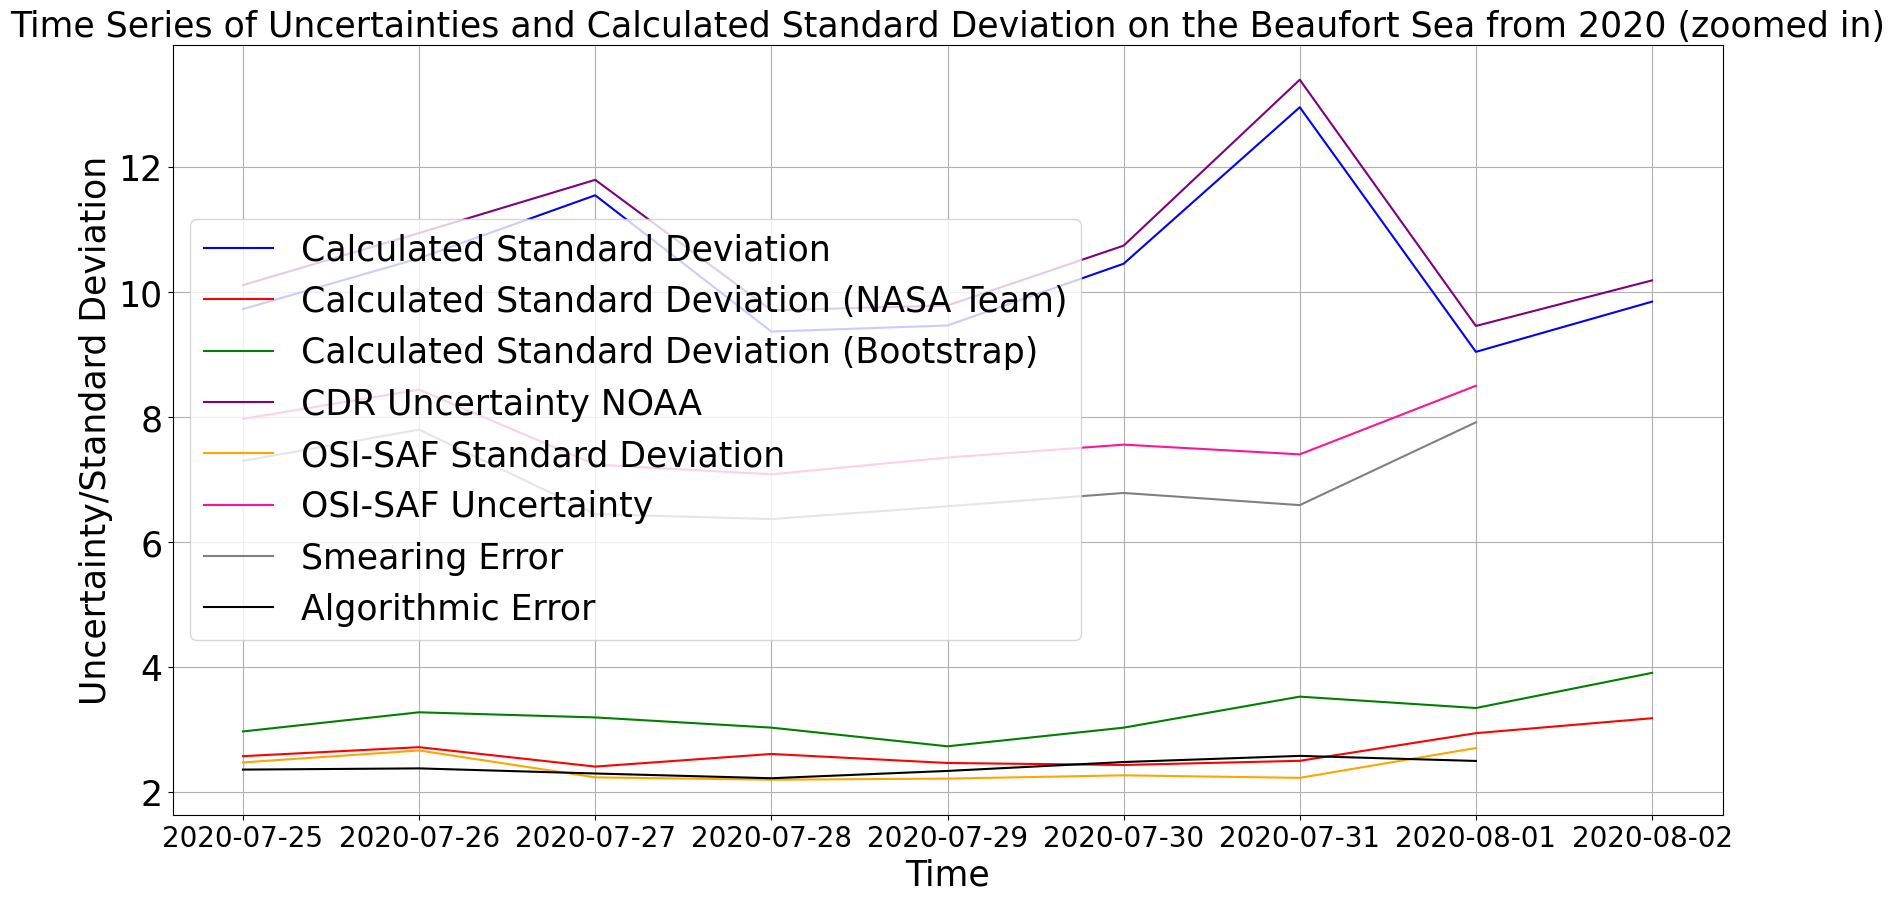

In [14]:
import pandas as pd
start_date = pd.to_datetime('2020-07-25')  # Define your start date
end_date = pd.to_datetime('2020-08-02')    # Define your end date

smearing_mean_2020=osi2020['smearing_standard_error'].mean(dim='yc')
smearing_mean_2020=smearing_mean_2020.mean(dim='xc')
algo_mean_2020=osi2020['algorithm_standard_error'].mean(dim='yc')
algo_mean_2020=algo_mean_2020.mean(dim='xc')
smearing_mean_2020_zoomed = smearing_mean_2020.sel(time=slice(start_date, end_date))
algo_mean_2020_zoomed = algo_mean_2020.sel(time=slice(start_date, end_date))

# Slicing the data for the zoomed-in plot
zoomed_time = time2020[(time2020 >= start_date) & (time2020 <= end_date)]
stdev_mean_2020_zoomed = stdev_mean_2020[(time2020 >= start_date) & (time2020 <= end_date)]
stdev_mean_nt_2020_zoomed = stdev_mean_nt_2020[(time2020 >= start_date) & (time2020 <= end_date)]
stdev_mean_bt_2020_zoomed = stdev_mean_bt_2020[(time2020 >= start_date) & (time2020 <= end_date)]
uncertainty_mean_noaa_2020_zoomed = uncertainty_mean_noaa_2020[(time2020 >= start_date) & (time2020 <= end_date)]
stdev_mean_osi_2020_zoomed = stdev_mean_osi_2020.sel(time=slice(start_date, end_date))
uncertainty_mean_osi_2020_zoomed = uncertainty_mean_osi_2020.sel(time=slice(start_date, end_date))

plt.figure(figsize=(20, 10))
plt.plot(zoomed_time, stdev_mean_2020_zoomed*100, label='Calculated Standard Deviation', color='blue')
plt.plot(zoomed_time, stdev_mean_nt_2020_zoomed*100, label='Calculated Standard Deviation (NASA Team)', color='red')
plt.plot(zoomed_time, stdev_mean_bt_2020_zoomed*100, label='Calculated Standard Deviation (Bootstrap)', color='green')
plt.plot(zoomed_time, uncertainty_mean_noaa_2020_zoomed*100, label='CDR Uncertainty NOAA', color='purple')
plt.plot(zoomed_time[:len(stdev_mean_osi_2020_zoomed)], stdev_mean_osi_2020_zoomed, label='OSI-SAF Standard Deviation', color='orange')
plt.plot(zoomed_time[:len(uncertainty_mean_osi_2020_zoomed):], uncertainty_mean_osi_2020_zoomed, label='OSI-SAF Uncertainty', color='deeppink')
plt.plot(zoomed_time[:len(smearing_mean_2020_zoomed):], smearing_mean_2020_zoomed, label='Smearing Error', color='grey')
plt.plot(zoomed_time[:len(algo_mean_2020_zoomed):], algo_mean_2020_zoomed, label='Algorithmic Error', color='black')

plt.xlabel('Time',fontsize=25)
plt.ylabel('Uncertainty/Standard Deviation',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=25)
plt.legend(fontsize=25, loc='center left')
plt.title('Time Series of Uncertainties and Calculated Standard Deviation on the Beaufort Sea from 2020 (zoomed in)',fontsize=25)
plt.grid()
#plt.savefig('zoom_2020_all_unc_beaufort.png')
plt.show()

#### SIC maps on 31 July 2020

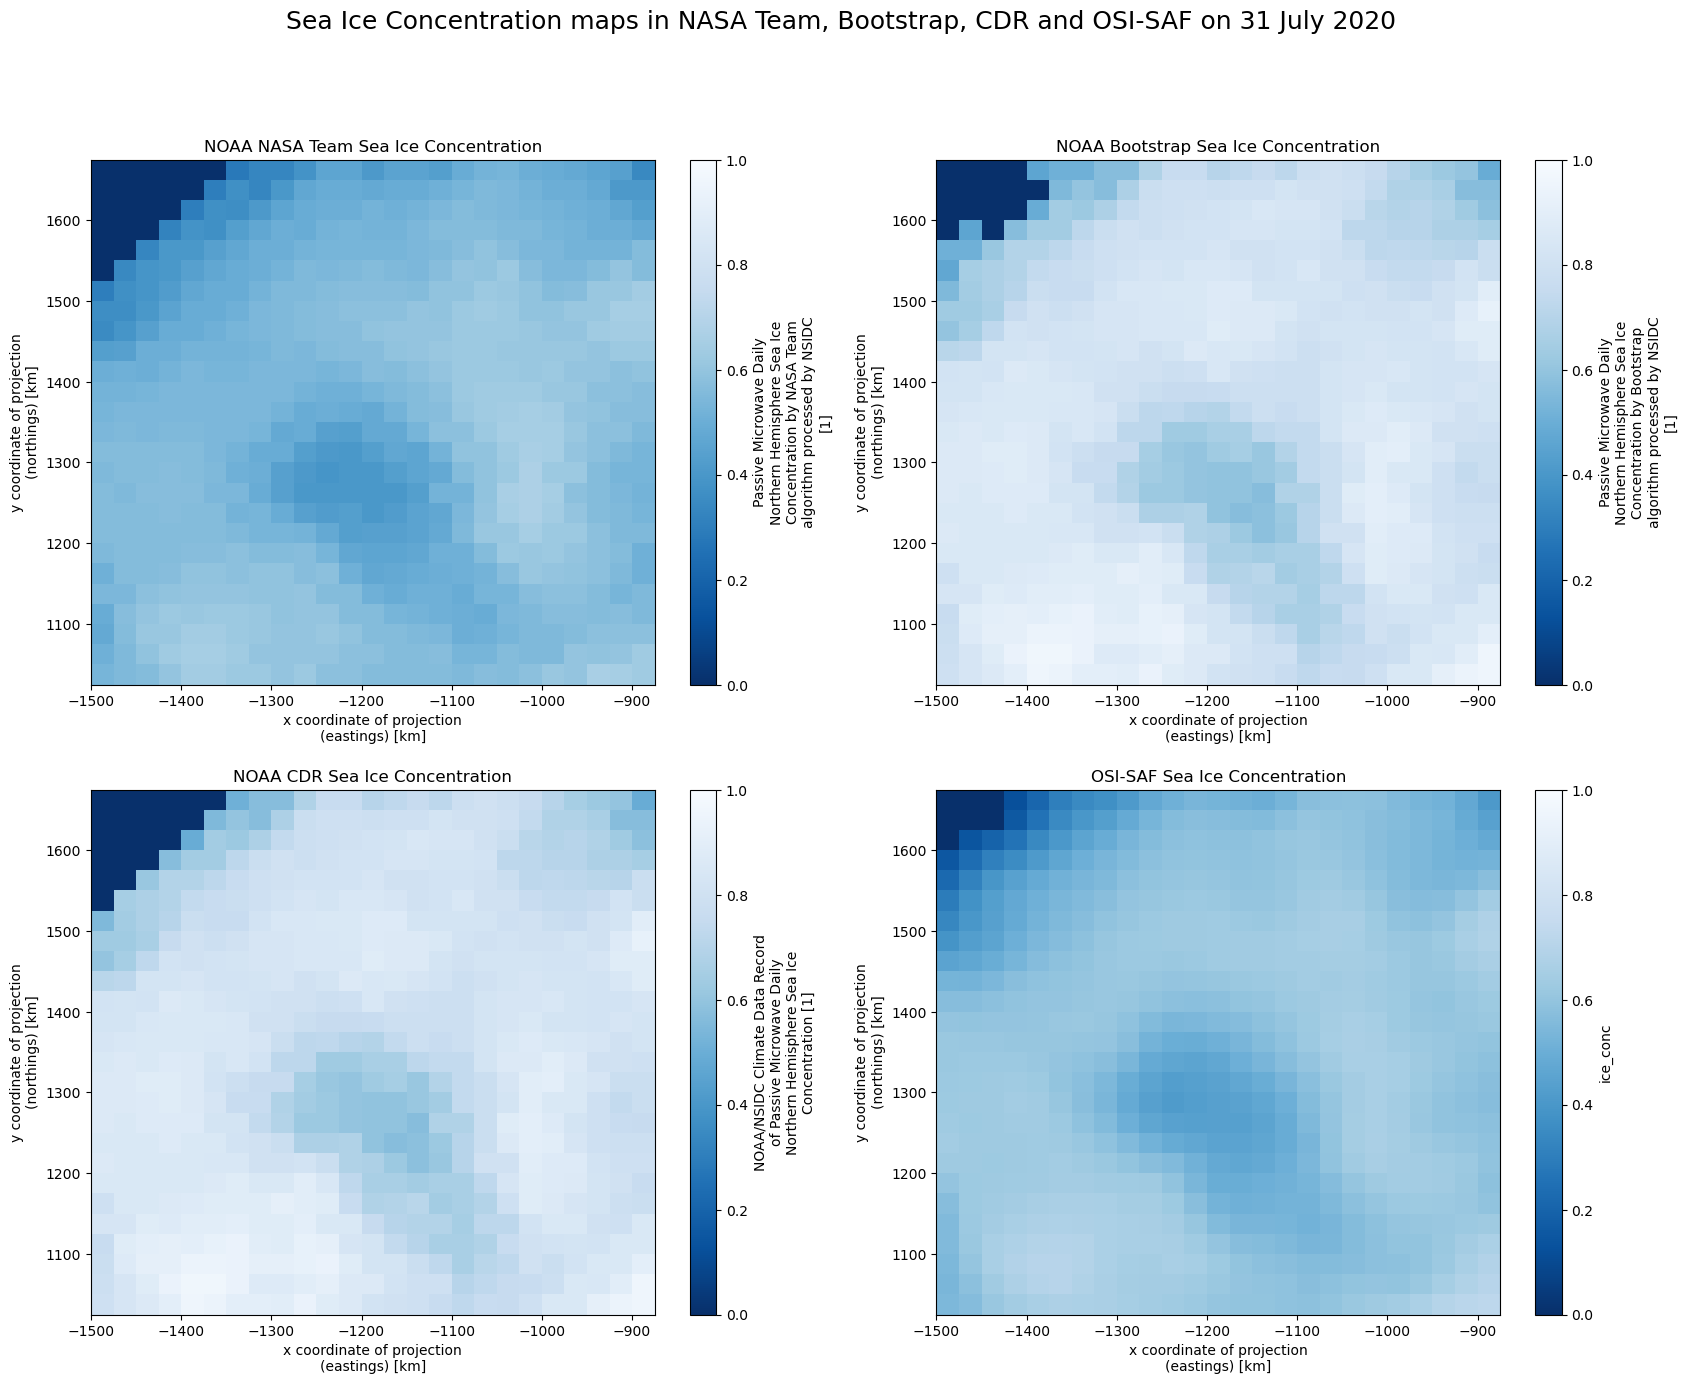

In [17]:
noaa2020_bt=noaa2020['nsidc_bt_seaice_conc'].isel(time=212)
noaa2020_nt=noaa2020['nsidc_nt_seaice_conc'].isel(time=212)
noaa2020_cdr=noaa2020['cdr_seaice_conc'].isel(time=212)
osi2020_sic=(osi2020['ice_conc']).isel(time=212)
custom_cmap = 'Blues_r'
vmin=0
vmax=1

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

noaa2020_nt.plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[0, 0])
axes[0, 0].set_title('NOAA NASA Team Sea Ice Concentration')

noaa2020_bt.plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[0, 1])
axes[0, 1].set_title('NOAA Bootstrap Sea Ice Concentration')

noaa2020_cdr.plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[1, 0])
axes[1, 0].set_title('NOAA CDR Sea Ice Concentration')

(osi2020_sic/100).plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[1, 1])
axes[1, 1].set_title('OSI-SAF Sea Ice Concentration')

fig.suptitle('Sea Ice Concentration maps in NASA Team, Bootstrap, CDR and OSI-SAF on 31 July 2020',fontsize=18)

#plt.savefig('31_07_2020_SICS.png')
plt.show()

#### Difference map between NASA Team and Bootstrap SIC

Text(0.5, 1.0, 'Difference of NT & BS SIC on 31 July 2020')

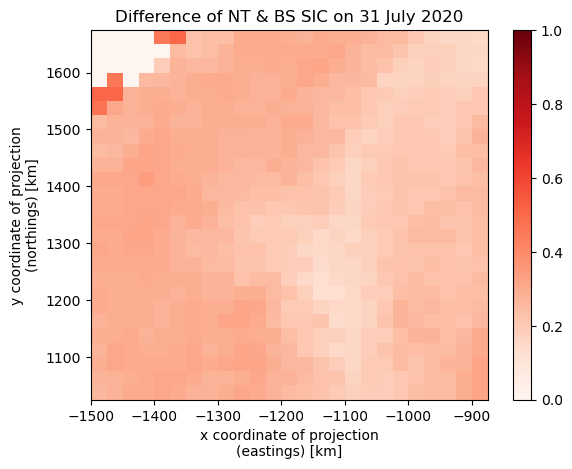

In [18]:
diff=noaa2020_bt-noaa2020_nt
diff.plot(cmap='Reds', vmin=0, vmax=1.0)
plt.title('Difference of NT & BS SIC on 31 July 2020')
#plt.savefig('difference_bt_nt_SICS_31_july_2020.png')

#### Scatterplot of NOAA CDR Uncertainty vs NT, BS and difference of NT & BS SIC in Beaufort Sea on 2020

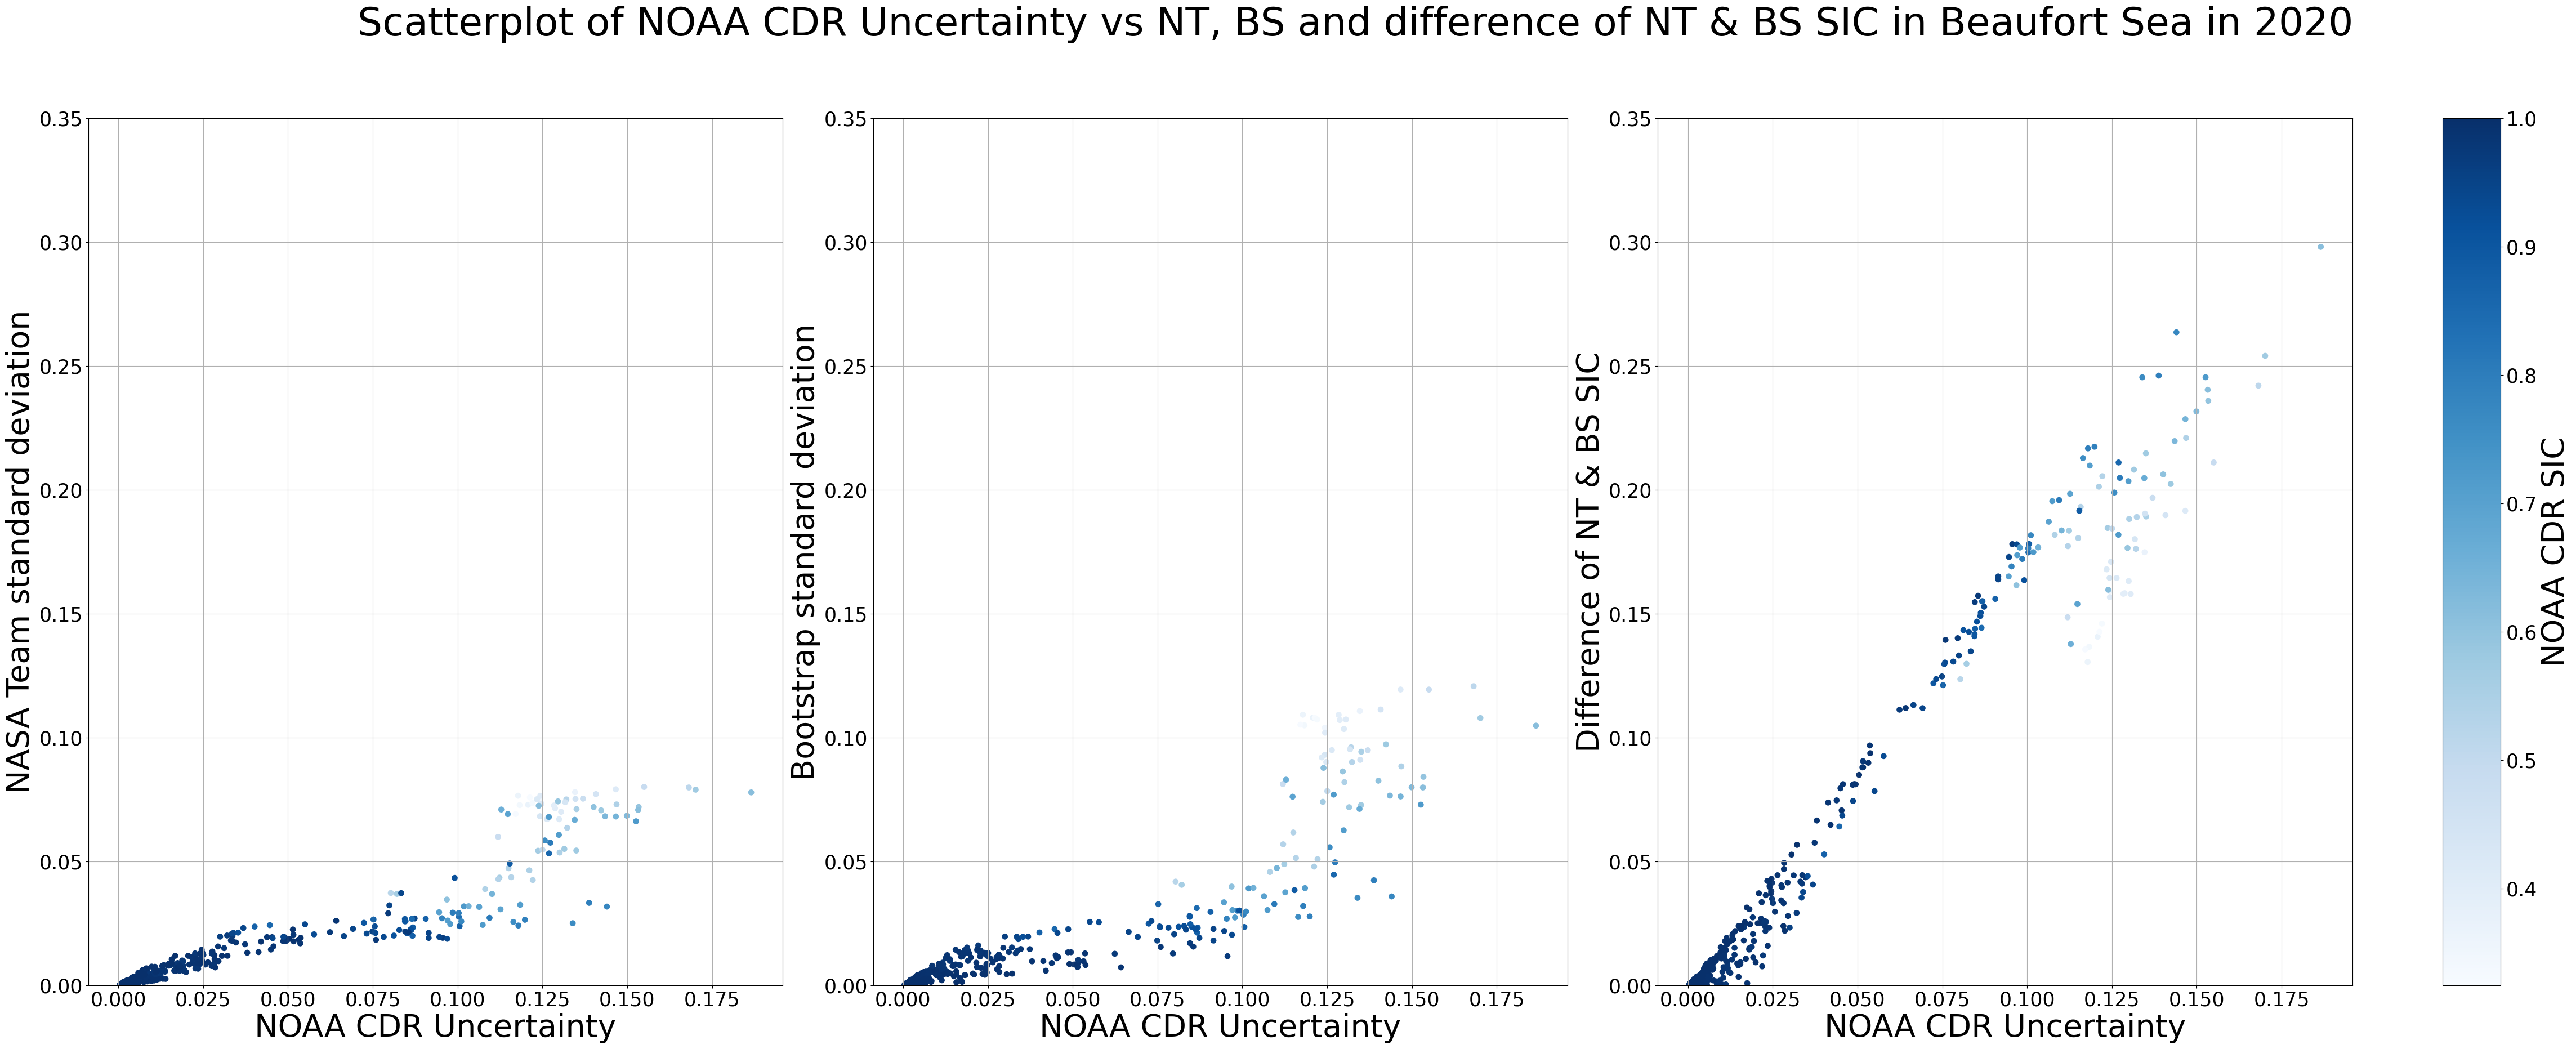

In [19]:
import matplotlib.gridspec as gridspec

noaa2020_unc_mean=noaa2020['stdev_of_cdr_seaice_conc'].mean(dim='xc')
noaa2020_unc_mean=noaa2020_unc_mean.mean(dim='yc')

noaa2020_cdr_mean=noaa2020['cdr_seaice_conc'].mean(dim='xc')
noaa2020_cdr_mean=noaa2020_cdr_mean.mean(dim='yc')

color_values = noaa2020_cdr_mean

smear_2020_mean=osi2020['smearing_standard_error'].mean(dim='yc')
smear_2020_mean=smear_2020_mean.mean(dim='xc')

noaa2020_nt_stdv_mean=noaa2020['standard_deviation_nt'].mean(dim='xc')
noaa2020_nt_stdv_mean=noaa2020_nt_stdv_mean.mean(dim='yc')

noaa2020_bt_stdv_mean=noaa2020['standard_deviation_bt'].mean(dim='xc')
noaa2020_bt_stdv_mean=noaa2020_bt_stdv_mean.mean(dim='yc')

noaa2020_stdv_mean=noaa2020['standard_deviation'].mean(dim='xc')
noaa2020_stdv_mean=noaa2020_stdv_mean.mean(dim='yc')

noaa2020_sic_nt=noaa2020['nsidc_nt_seaice_conc'].mean(dim='xc')
noaa2020_sic_nt=noaa2020_sic_nt.mean(dim='yc')

noaa2020_sic_bt=noaa2020['nsidc_bt_seaice_conc'].mean(dim='xc')
noaa2020_sic_bt=noaa2020_sic_bt.mean(dim='yc')

# Create the scatter plot
fig = plt.figure(figsize=(60, 20))
gs = gridspec.GridSpec(1, 5, width_ratios=[6,6,6,0.5,1])

ax1 = fig.add_subplot(gs[0])
scatter1 = ax1.scatter(noaa2020_unc_mean, noaa2020_nt_stdv_mean, c=color_values, cmap='Blues', label='NASA Team standard deviation', s=45)
ax1.set_xlabel('NOAA CDR Uncertainty', fontsize=40)
ax1.set_ylabel('NASA Team standard deviation', fontsize=40)
ax1.tick_params(axis='both', which='major', labelsize=25)
plt.grid()
ax1.set_ylim(0.0, 0.35)

ax2 = fig.add_subplot(gs[1])
scatter2 = ax2.scatter(noaa2020_unc_mean, noaa2020_bt_stdv_mean, c=color_values, cmap='Blues', label='Bootstrap standard deviation', s=45)
ax2.set_xlabel('NOAA CDR Uncertainty', fontsize=40)
ax2.set_ylabel('Bootstrap standard deviation', fontsize=40)
ax2.tick_params(axis='both', which='major', labelsize=25)
plt.grid()
ax2.set_ylim(0.0, 0.35)

ax3 = fig.add_subplot(gs[2])
scatter3 = ax3.scatter(noaa2020_unc_mean, abs(noaa2020_sic_bt-noaa2020_sic_nt), c=color_values, cmap='Blues', label='NOAA CDR Uncertainty', s=45)
ax3.set_xlabel('NOAA CDR Uncertainty', fontsize=40)
ax3.set_ylabel('Difference of NT & BS SIC', fontsize=40)
ax3.tick_params(axis='both', which='major', labelsize=25)
plt.grid()
ax3.set_ylim(0.0, 0.35)

cbar_ax3 = fig.add_subplot(gs[3])
cbar3 = plt.colorbar(scatter3, cax=cbar_ax3)
cbar3.set_label('NOAA CDR SIC', fontsize=40)
cbar3.ax.tick_params(labelsize=25)

plt.suptitle('Scatterplot of NOAA CDR Uncertainty vs NT, BS and difference of NT & BS SIC in Beaufort Sea in 2020', fontsize=50)
#plt.savefig('Scatterplot_BSsd_NTsd_NOAAsd_vs_NOAAunc_2020.png')
plt.show()

#### Plotting the time series of uncertainties and standard deviations for 2005

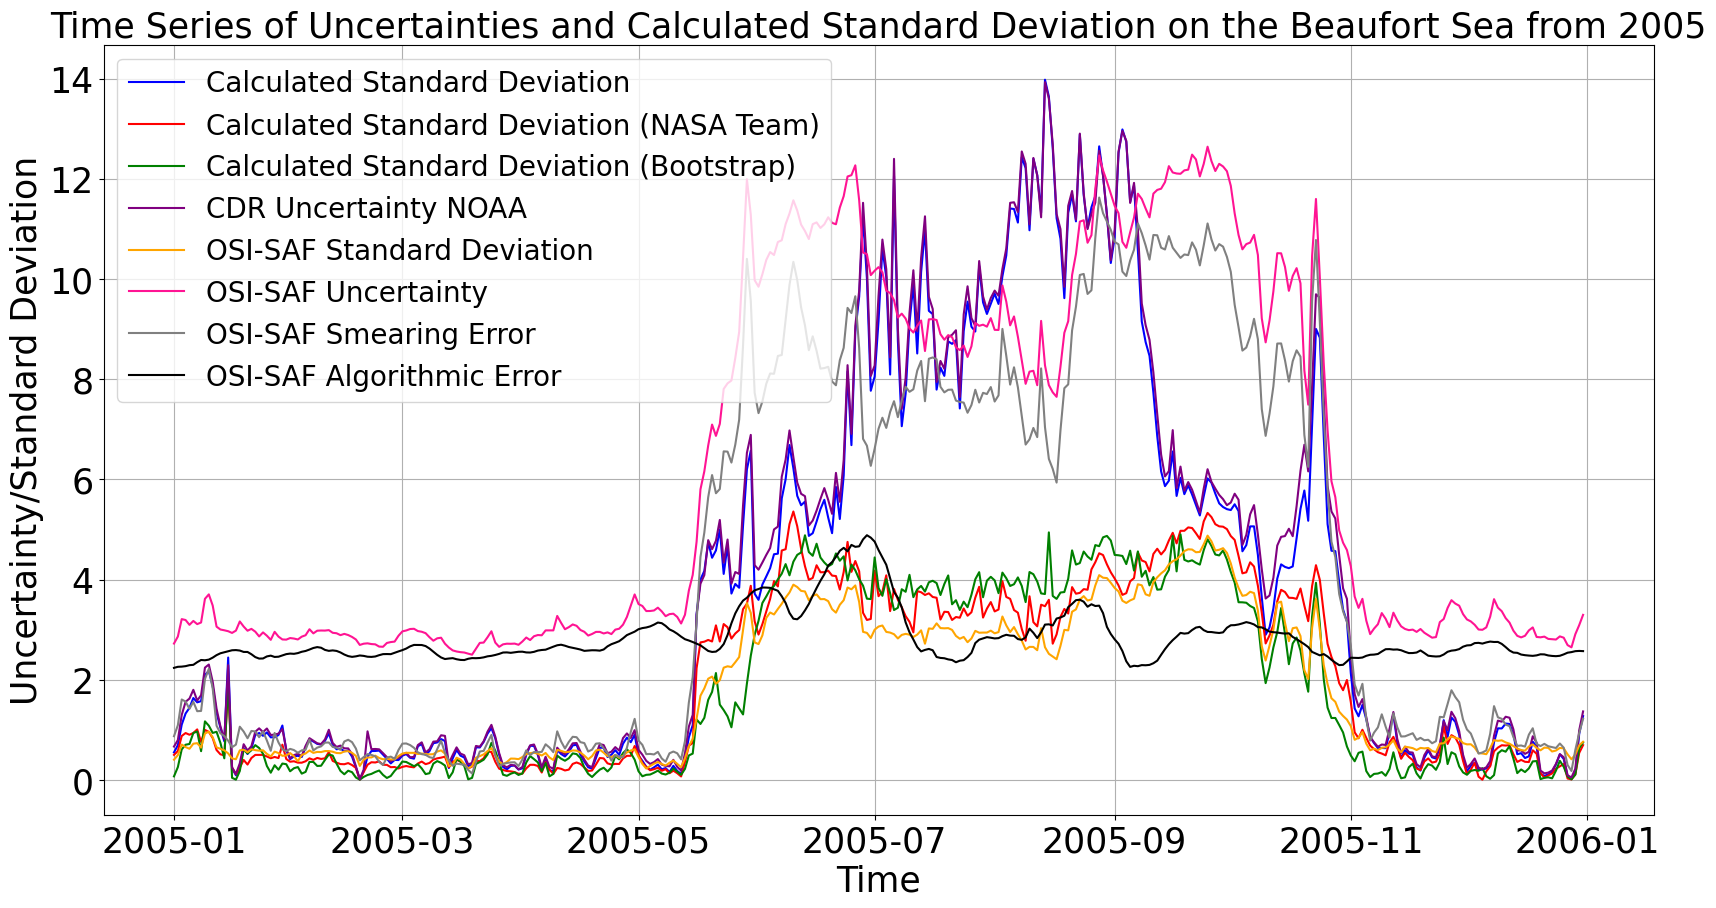

In [20]:
stdev_mean_2005=noaa2005['standard_deviation'].mean(dim='yc')
stdev_mean_2005=stdev_mean_2005.mean(dim='xc')

stdev_mean_nt_2005=noaa2005['standard_deviation_nt'].mean(dim='yc')
stdev_mean_nt_2005=stdev_mean_nt_2005.mean(dim='xc')

stdev_mean_bt_2005=noaa2005['standard_deviation_bt'].mean(dim='yc')
stdev_mean_bt_2005=stdev_mean_bt_2005.mean(dim='xc')

uncertainty_mean_noaa_2005=noaa2005['stdev_of_cdr_seaice_conc'].mean(dim='yc')
uncertainty_mean_noaa_2005=uncertainty_mean_noaa_2005.mean(dim='xc')

stdev_mean_osi_2005=osi2005['standard_deviation_osi'].mean(dim='yc')
stdev_mean_osi_2005=stdev_mean_osi_2005.mean(dim='xc')

uncertainty_mean_osi_2005=osi2005['total_standard_error'].mean(dim='yc')
uncertainty_mean_osi_2005=uncertainty_mean_osi_2005.mean(dim='xc')

smearing_mean_2005=osi2005['smearing_standard_error'].mean(dim='yc')
smearing_mean_2005=smearing_mean_2005.mean(dim='xc')

algo_mean_2005=osi2005['algorithm_standard_error'].mean(dim='yc')
algo_mean_2005=algo_mean_2005.mean(dim='xc')

time2005=noaa2005['time']


plt.figure(figsize=(20, 10))
plt.plot(time2005, stdev_mean_2005*100, label='Calculated Standard Deviation', color='blue')
plt.plot(time2005, stdev_mean_nt_2005*100, label='Calculated Standard Deviation (NASA Team)', color='red')
plt.plot(time2005, stdev_mean_bt_2005*100, label='Calculated Standard Deviation (Bootstrap)', color='green')
plt.plot(time2005, uncertainty_mean_noaa_2005*100, label='CDR Uncertainty NOAA', color='purple')
plt.plot(time2005[-len(stdev_mean_osi_2005):], stdev_mean_osi_2005, label='OSI-SAF Standard Deviation', color='orange')
plt.plot(time2005[-len(stdev_mean_osi_2005):], uncertainty_mean_osi_2005, label='OSI-SAF Uncertainty', color='deeppink')
plt.plot(time2005[-len(stdev_mean_osi_2005):], smearing_mean_2005, label='OSI-SAF Smearing Error', color='grey')
plt.plot(time2005[-len(stdev_mean_osi_2005):], algo_mean_2005, label='OSI-SAF Algorithmic Error', color='black')

# Add labels and legend
plt.xlabel('Time',fontsize=25)
plt.ylabel('Uncertainty/Standard Deviation',fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=20)

# Add a title
plt.title('Time Series of Uncertainties and Calculated Standard Deviation on the Beaufort Sea from 2005',fontsize=25)

# Show the plot
plt.grid()
#plt.savefig('all_unc_beaufort_2005.png')
plt.show()

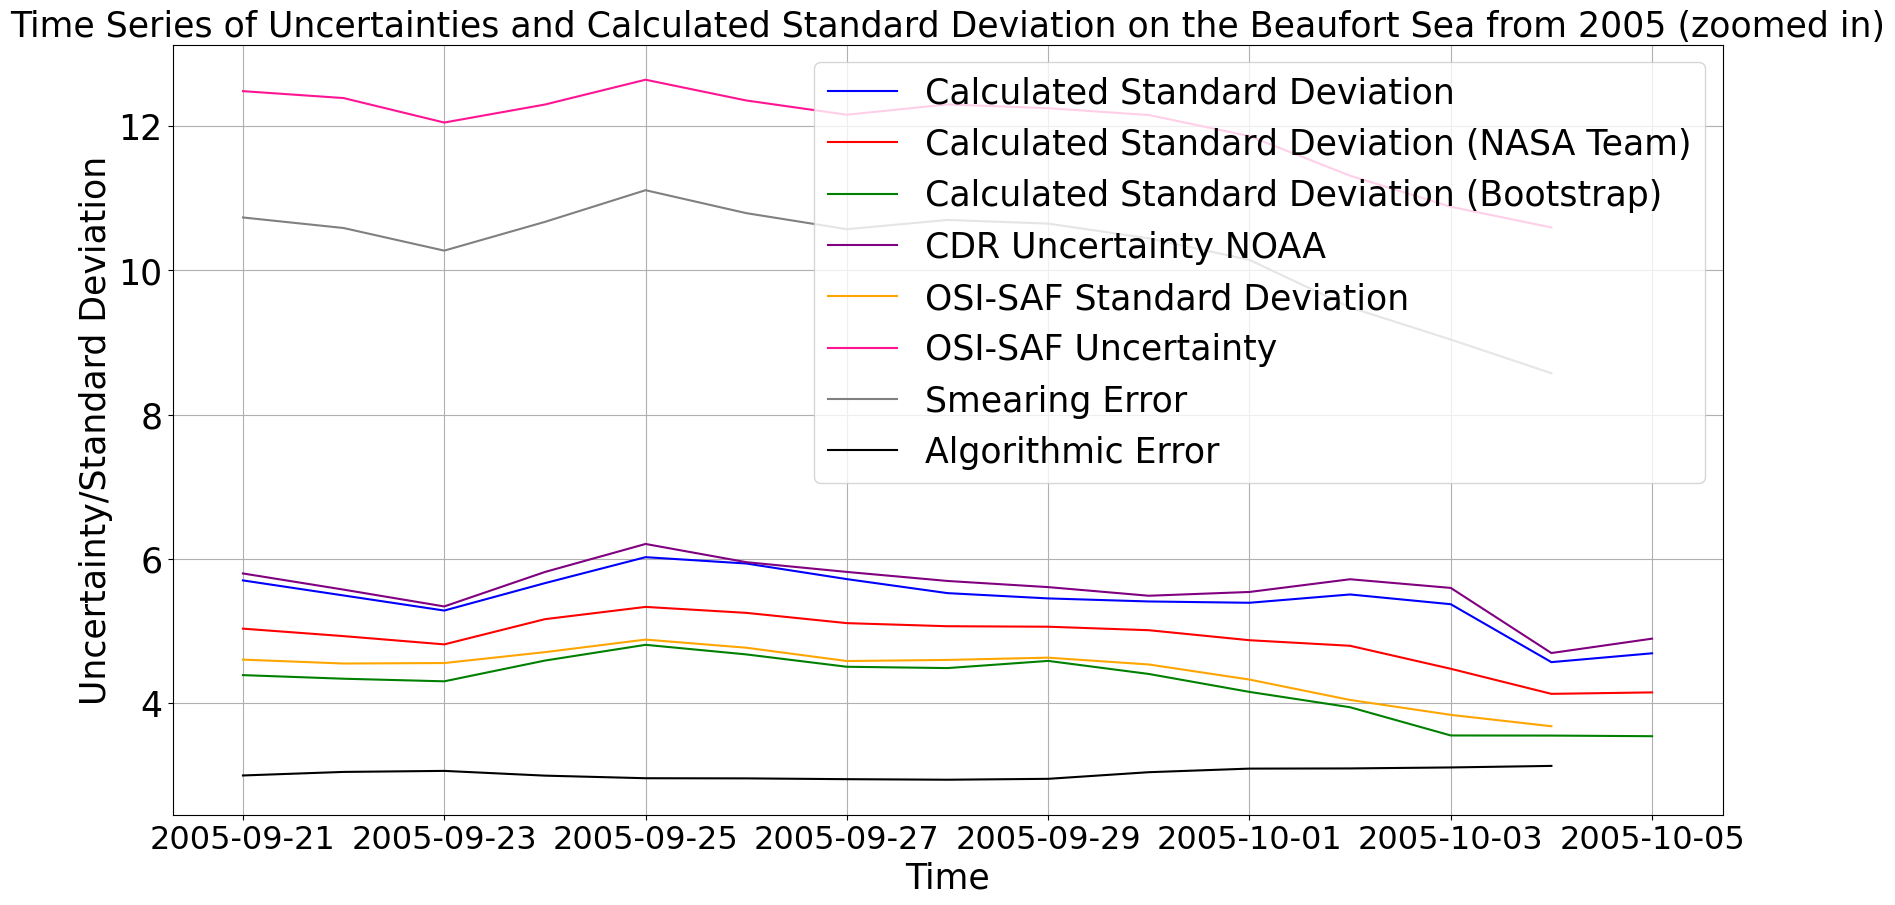

In [21]:
import pandas as pd
start_date = pd.to_datetime('2005-09-21')  # Define your start date
end_date = pd.to_datetime('2005-10-05')    # Define your end date
smearing_mean_2005=osi2005['smearing_standard_error'].mean(dim='yc')
smearing_mean_2005=smearing_mean_2005.mean(dim='xc')

algo_mean_2005=osi2005['algorithm_standard_error'].mean(dim='yc')
algo_mean_2005=algo_mean_2005.mean(dim='xc')

# Slicing the data for the zoomed-in plot
zoomed_time = time2005[(time2005 >= start_date) & (time2005 <= end_date)]
stdev_mean_2005_zoomed = stdev_mean_2005[(time2005 >= start_date) & (time2005 <= end_date)]
stdev_mean_nt_2005_zoomed = stdev_mean_nt_2005[(time2005 >= start_date) & (time2005 <= end_date)]
stdev_mean_bt_2005_zoomed = stdev_mean_bt_2005[(time2005 >= start_date) & (time2005 <= end_date)]
uncertainty_mean_noaa_2005_zoomed = uncertainty_mean_noaa_2005[(time2005 >= start_date) & (time2005 <= end_date)]
stdev_mean_osi_2005_zoomed = stdev_mean_osi_2005.sel(time=slice(start_date, end_date))
uncertainty_mean_osi_2005_zoomed = uncertainty_mean_osi_2005.sel(time=slice(start_date, end_date))
smearing_mean_2005_zoomed = smearing_mean_2005.sel(time=slice(start_date, end_date))
algo_mean_2005_zoomed = algo_mean_2005.sel(time=slice(start_date, end_date))

plt.figure(figsize=(20, 10))
plt.plot(zoomed_time, stdev_mean_2005_zoomed*100, label='Calculated Standard Deviation', color='blue')
plt.plot(zoomed_time, stdev_mean_nt_2005_zoomed*100, label='Calculated Standard Deviation (NASA Team)', color='red')
plt.plot(zoomed_time, stdev_mean_bt_2005_zoomed*100, label='Calculated Standard Deviation (Bootstrap)', color='green')
plt.plot(zoomed_time, uncertainty_mean_noaa_2005_zoomed*100, label='CDR Uncertainty NOAA', color='purple')
plt.plot(zoomed_time[:len(stdev_mean_osi_2005_zoomed)], stdev_mean_osi_2005_zoomed, label='OSI-SAF Standard Deviation', color='orange')
plt.plot(zoomed_time[:len(uncertainty_mean_osi_2005_zoomed):], uncertainty_mean_osi_2005_zoomed, label='OSI-SAF Uncertainty', color='deeppink')
plt.plot(zoomed_time[:len(smearing_mean_2005_zoomed):], smearing_mean_2005_zoomed, label='Smearing Error', color='grey')
plt.plot(zoomed_time[:len(algo_mean_2005_zoomed):], algo_mean_2005_zoomed, label='Algorithmic Error', color='black')
plt.xlabel('Time',fontsize=25)
plt.ylabel('Uncertainty/Standard Deviation',fontsize=25)
plt.xticks(fontsize=23)
plt.yticks(fontsize=25)
plt.legend(fontsize=25)
plt.title('Time Series of Uncertainties and Calculated Standard Deviation on the Beaufort Sea from 2005 (zoomed in)',fontsize=25)
plt.grid()
#plt.savefig('zoom_2005_all_unc_beaufort.png')
plt.show()

#### SIC Maps on 25 September 2005

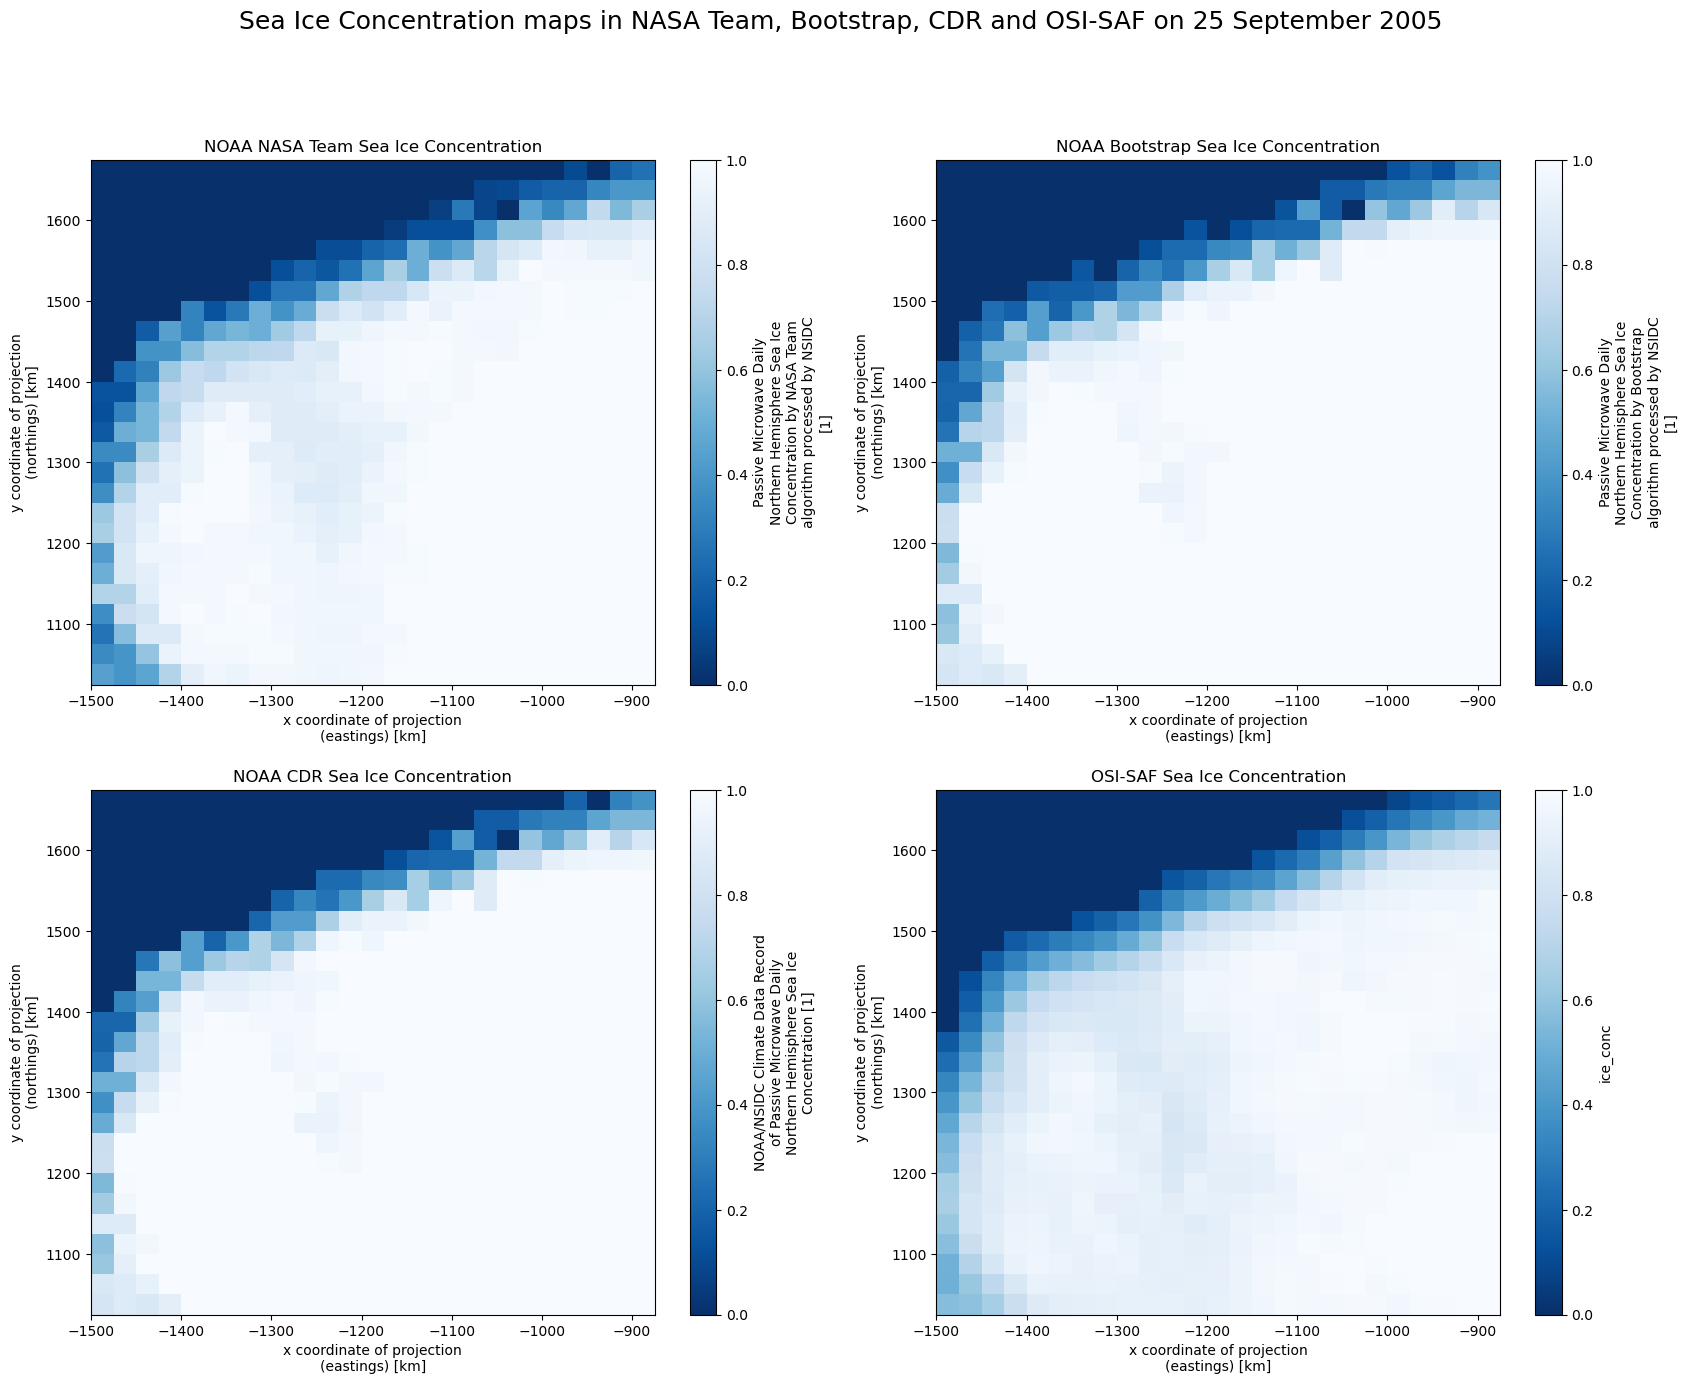

In [22]:
noaa2005_bt=noaa2005['nsidc_bt_seaice_conc'].isel(time=267)
noaa2005_nt=noaa2005['nsidc_nt_seaice_conc'].isel(time=267)
noaa2005_cdr=noaa2005['cdr_seaice_conc'].isel(time=267)
osi2005_sic=(osi2005['ice_conc']).isel(time=267)
custom_cmap = 'Blues_r'
vmin=0
vmax=1

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

noaa2005_nt.plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[0, 0])
axes[0, 0].set_title('NOAA NASA Team Sea Ice Concentration')

noaa2005_bt.plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[0, 1])
axes[0, 1].set_title('NOAA Bootstrap Sea Ice Concentration')

noaa2005_cdr.plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[1, 0])
axes[1, 0].set_title('NOAA CDR Sea Ice Concentration')

(osi2005_sic/100).plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[1, 1])
axes[1, 1].set_title('OSI-SAF Sea Ice Concentration')

fig.suptitle('Sea Ice Concentration maps in NASA Team, Bootstrap, CDR and OSI-SAF on 25 September 2005',fontsize=18)

#plt.savefig('25_09_2005_SICS.png')
plt.show()

#### Smearing and algorithmic error on 25 September 2005

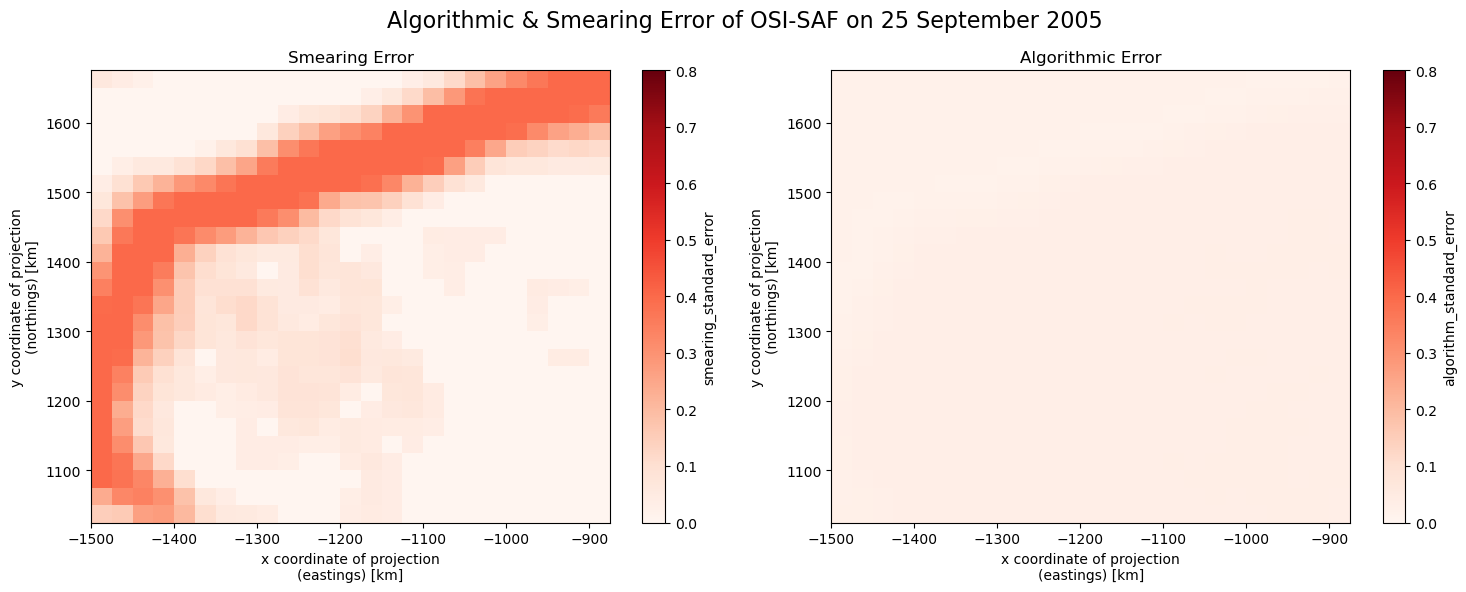

In [24]:
osi2005_sic_smear=(osi2005['smearing_standard_error']).isel(time=267)
osi2005_sic_algo=(osi2005['algorithm_standard_error']).isel(time=267)

custom_cmap = 'Reds'
vmin=0
vmax=0.8

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
(osi2005_sic_smear/100).plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[0])
axes[0].set_title('Smearing Error')

(osi2005_sic_algo/100).plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[1])
axes[1].set_title('Algorithmic Error')

plt.suptitle('Algorithmic & Smearing Error of OSI-SAF on 25 September 2005', fontsize=16)
plt.tight_layout()
#plt.savefig('smear_algo_25_09_2005.png')
plt.show()

#### Scatterplot of OSI-SAF Uncertainty and Smearing and Algorithmic error in Beaufort Sea on 2005

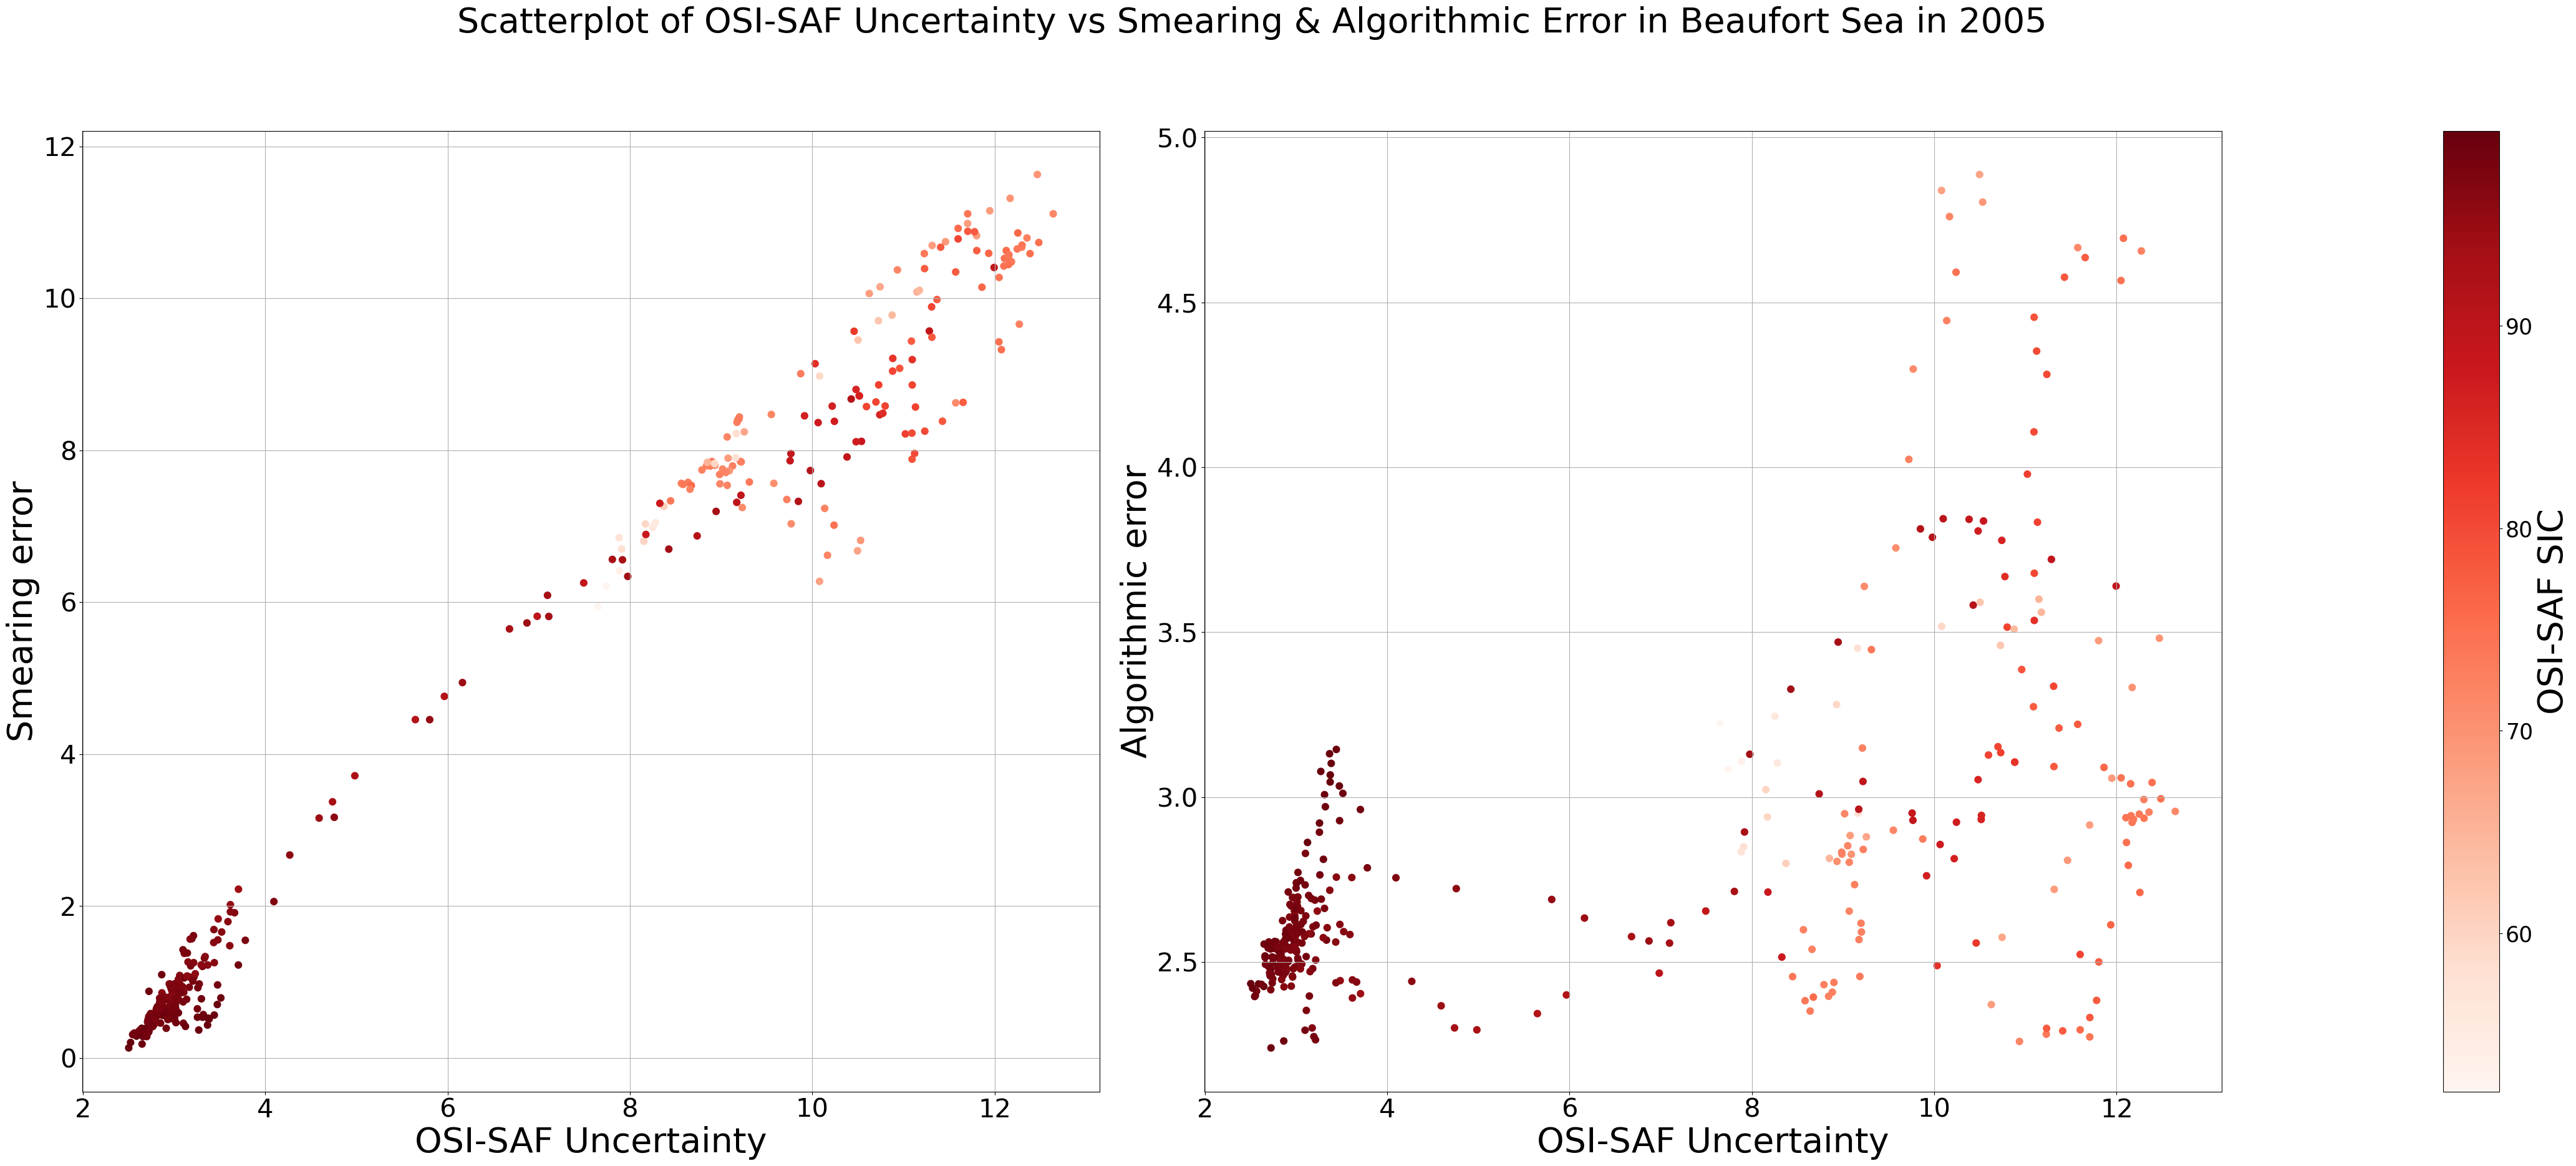

In [25]:
smear_2005_mean=osi2005['smearing_standard_error'].mean(dim='yc')
smear_2005_mean=smear_2005_mean.mean(dim='xc')

osi2005_sic_mean=osi2005['ice_conc'].mean(dim='xc')
osi2005_sic_mean=osi2005_sic_mean.mean(dim='yc')

osi_unc_mean=osi2005['total_standard_error'].mean(dim='yc')
osi_unc_mean=osi_unc_mean.mean(dim='xc')

algo_2005_mean=osi2005['algorithm_standard_error'].mean(dim='yc')
algo_2005_mean=algo_2005_mean.mean(dim='xc')

color_values1=osi2005_sic_mean

fig = plt.figure(figsize=(50, 20))
gs = gridspec.GridSpec(1, 4, width_ratios=[9,9,0.1,0.5])

ax1 = fig.add_subplot(gs[0])
scatter1 = ax1.scatter(osi_unc_mean,smear_2005_mean, c=color_values1, cmap='Reds', s=60)
ax1.set_ylabel('Smearing error', fontsize=40)
ax1.set_xlabel('OSI-SAF Uncertainty', fontsize=40)
ax1.tick_params(axis='both', which='major', labelsize=30)
plt.grid()

ax2 = fig.add_subplot(gs[1])
scatter2 = ax2.scatter(osi_unc_mean,algo_2005_mean, c=color_values1, cmap='Reds', s=60)
ax2.set_ylabel('Algorithmic error', fontsize=40)
ax2.set_xlabel('OSI-SAF Uncertainty', fontsize=40)
ax2.tick_params(axis='both', which='major', labelsize=30)
plt.grid()

cbar_ax3 = fig.add_subplot(gs[3])
cbar3 = plt.colorbar(scatter1, cax=cbar_ax3)
cbar3.set_label('OSI-SAF SIC', fontsize=40)
cbar3.ax.tick_params(labelsize=25)


plt.suptitle('Scatterplot of OSI-SAF Uncertainty vs Smearing & Algorithmic Error in Beaufort Sea in 2005', fontsize=40)
#plt.savefig('Scatterplot_smear_algo_vs_osi_unc_2005.png')
plt.show()

#### Plotting the time series of uncertainties and standard deviations for 2000

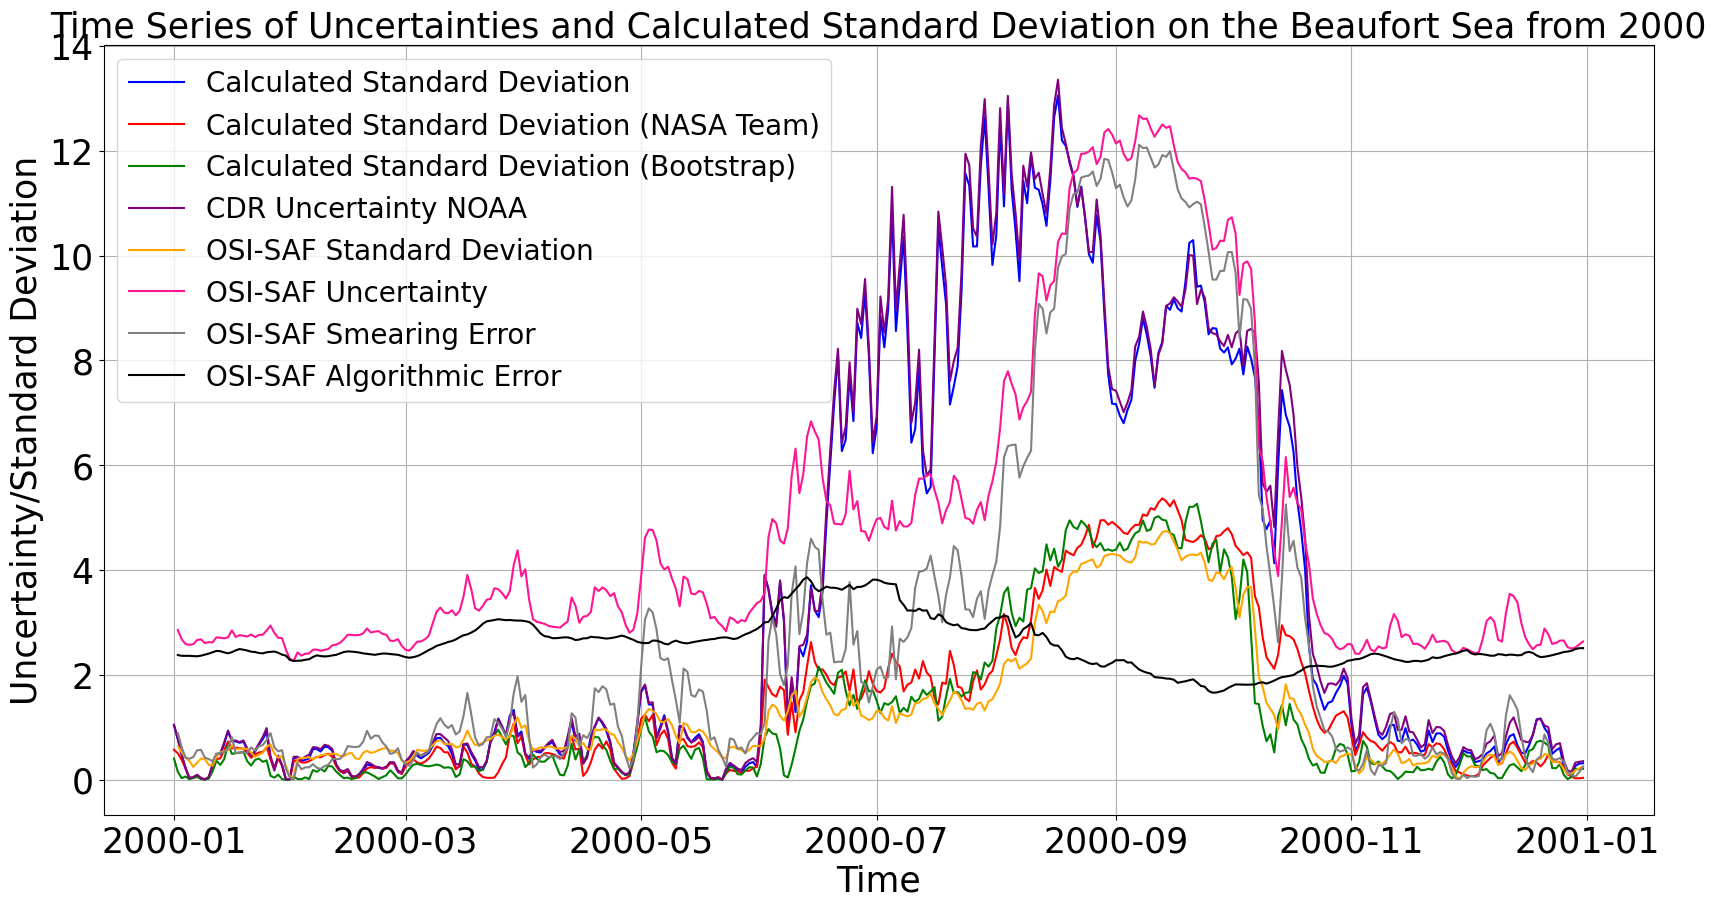

In [26]:
stdev_mean_2000=noaa2000['standard_deviation'].mean(dim='yc')
stdev_mean_2000=stdev_mean_2000.mean(dim='xc')

stdev_mean_nt_2000=noaa2000['standard_deviation_nt'].mean(dim='yc')
stdev_mean_nt_2000=stdev_mean_nt_2000.mean(dim='xc')

stdev_mean_bt_2000=noaa2000['standard_deviation_bt'].mean(dim='yc')
stdev_mean_bt_2000=stdev_mean_bt_2000.mean(dim='xc')

uncertainty_mean_noaa_2000=noaa2000['stdev_of_cdr_seaice_conc'].mean(dim='yc')
uncertainty_mean_noaa_2000=uncertainty_mean_noaa_2000.mean(dim='xc')

stdev_mean_osi_2000=osi2000['standard_deviation_osi'].mean(dim='yc')
stdev_mean_osi_2000=stdev_mean_osi_2000.mean(dim='xc')

uncertainty_mean_osi_2000=osi2000['total_standard_error'].mean(dim='yc')
uncertainty_mean_osi_2000=uncertainty_mean_osi_2000.mean(dim='xc')

smearing_mean_2000=osi2000['smearing_standard_error'].mean(dim='yc')
smearing_mean_2000=smearing_mean_2000.mean(dim='xc')

algo_mean_2000=osi2000['algorithm_standard_error'].mean(dim='yc')
algo_mean_2000=algo_mean_2000.mean(dim='xc')

time2000=noaa2000['time']


plt.figure(figsize=(20, 10))
plt.plot(time2000, stdev_mean_2000*100, label='Calculated Standard Deviation', color='blue')
plt.plot(time2000, stdev_mean_nt_2000*100, label='Calculated Standard Deviation (NASA Team)', color='red')
plt.plot(time2000, stdev_mean_bt_2000*100, label='Calculated Standard Deviation (Bootstrap)', color='green')
plt.plot(time2000, uncertainty_mean_noaa_2000*100, label='CDR Uncertainty NOAA', color='purple')
plt.plot(time2000[-len(stdev_mean_osi_2000):], stdev_mean_osi_2000, label='OSI-SAF Standard Deviation', color='orange')
plt.plot(time2000[-len(stdev_mean_osi_2000):], uncertainty_mean_osi_2000, label='OSI-SAF Uncertainty', color='deeppink')
plt.plot(time2000[-len(stdev_mean_osi_2000):], smearing_mean_2000, label='OSI-SAF Smearing Error', color='grey')
plt.plot(time2000[-len(stdev_mean_osi_2000):], algo_mean_2000, label='OSI-SAF Algorithmic Error', color='black')
# Add labels and legend
plt.xlabel('Time',fontsize=25)
plt.ylabel('Uncertainty/Standard Deviation',fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=20)

# Add a title
plt.title('Time Series of Uncertainties and Calculated Standard Deviation on the Beaufort Sea from 2000',fontsize=25)

# Show the plot
plt.grid()
#plt.savefig('all_unc_beaufort_2000.png')
plt.show()

#### Zooming in to July 2000

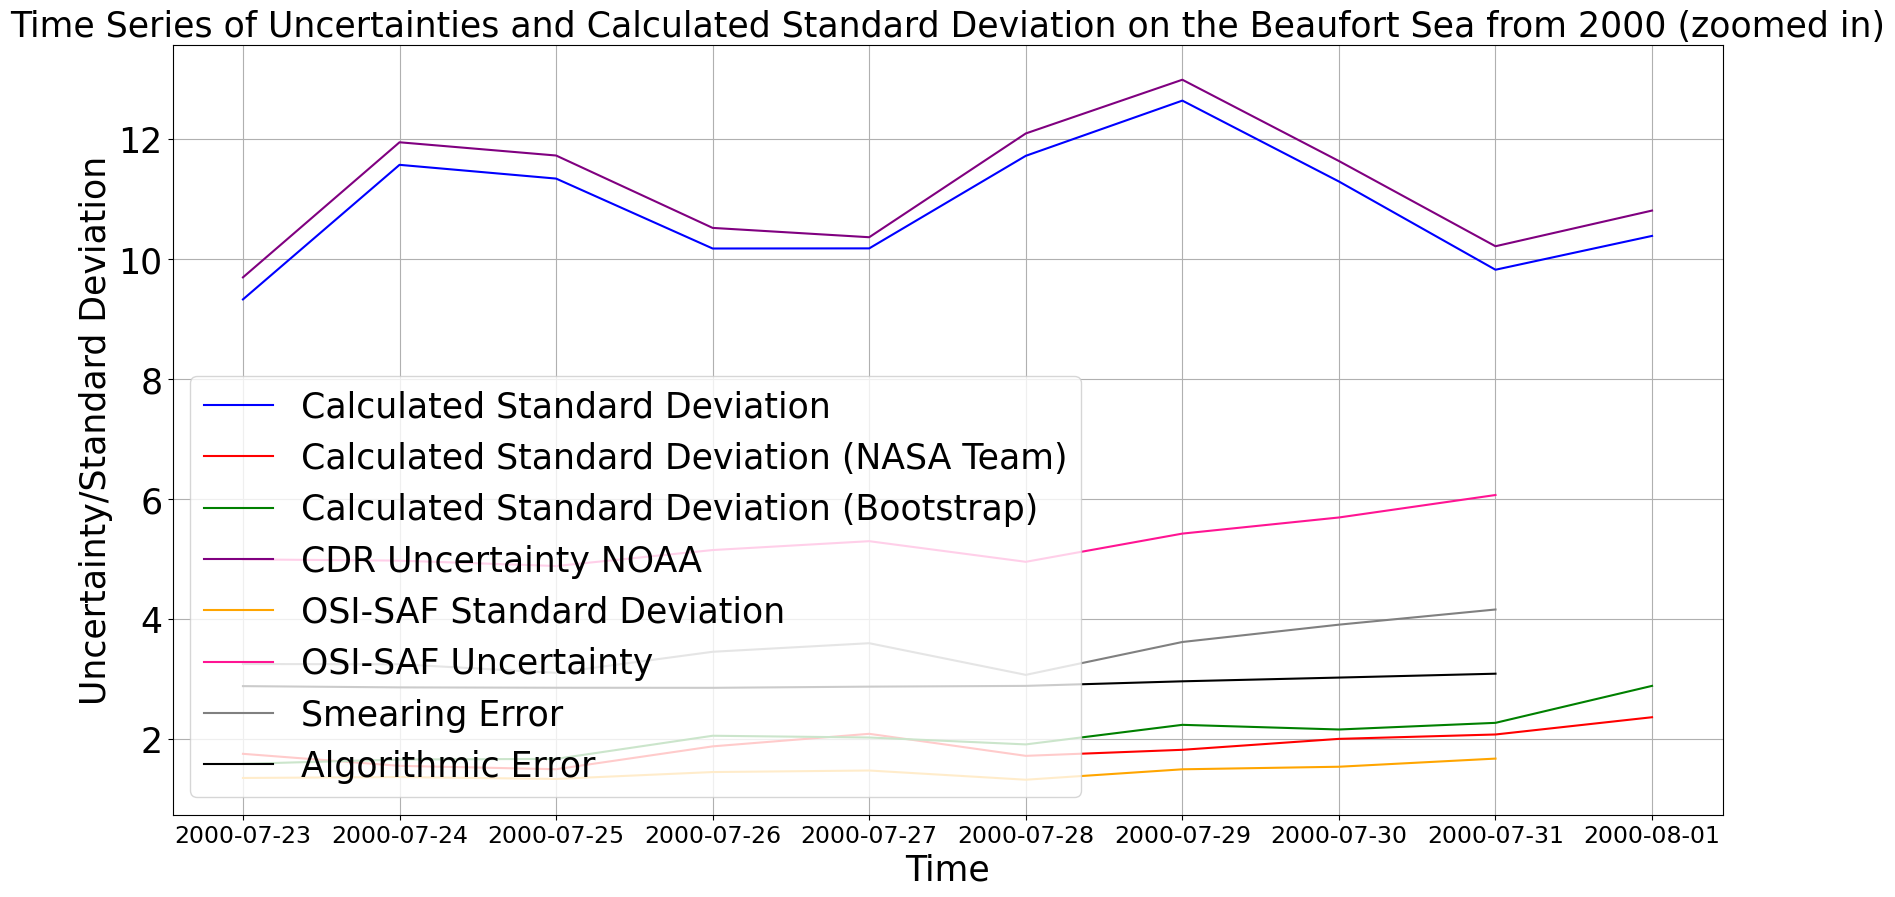

In [28]:
import pandas as pd
start_date = pd.to_datetime('2000-07-23')  # Define your start date
end_date = pd.to_datetime('2000-08-01')    # Define your end date

stdev_mean_2000=noaa2000['standard_deviation'].mean(dim='yc')
stdev_mean_2000=stdev_mean_2000.mean(dim='xc')

stdev_mean_nt_2000=noaa2000['standard_deviation_nt'].mean(dim='yc')
stdev_mean_nt_2000=stdev_mean_nt_2000.mean(dim='xc')

stdev_mean_bt_2000=noaa2000['standard_deviation_bt'].mean(dim='yc')
stdev_mean_bt_2000=stdev_mean_bt_2000.mean(dim='xc')

uncertainty_mean_noaa_2000=noaa2000['stdev_of_cdr_seaice_conc'].mean(dim='yc')
uncertainty_mean_noaa_2000=uncertainty_mean_noaa_2000.mean(dim='xc')

stdev_mean_osi_2000=osi2000['standard_deviation_osi'].mean(dim='yc')
stdev_mean_osi_2000=stdev_mean_osi_2000.mean(dim='xc')

uncertainty_mean_osi_2000=osi2000['total_standard_error'].mean(dim='yc')
uncertainty_mean_osi_2000=uncertainty_mean_osi_2000.mean(dim='xc')

smearing_mean_2000=osi2000['smearing_standard_error'].mean(dim='yc')
smearing_mean_2000=smearing_mean_2000.mean(dim='xc')

algo_mean_2000=osi2000['algorithm_standard_error'].mean(dim='yc')
algo_mean_2000=algo_mean_2000.mean(dim='xc')

time2000=noaa2000['time']

# Slicing the data for the zoomed-in plot
zoomed_time = time2000[(time2000 >= start_date) & (time2000 <= end_date)]
stdev_mean_2000_zoomed = stdev_mean_2000[(time2000 >= start_date) & (time2000 <= end_date)]
stdev_mean_nt_2000_zoomed = stdev_mean_nt_2000[(time2000 >= start_date) & (time2000 <= end_date)]
stdev_mean_bt_2000_zoomed = stdev_mean_bt_2000[(time2000 >= start_date) & (time2000 <= end_date)]
uncertainty_mean_noaa_2000_zoomed = uncertainty_mean_noaa_2000[(time2000 >= start_date) & (time2000 <= end_date)]
stdev_mean_osi_2000_zoomed = stdev_mean_osi_2000.sel(time=slice(start_date, end_date))
uncertainty_mean_osi_2000_zoomed = uncertainty_mean_osi_2000.sel(time=slice(start_date, end_date))
smearing_mean_2000_zoomed = smearing_mean_2000.sel(time=slice(start_date, end_date))
algo_mean_2000_zoomed = algo_mean_2000.sel(time=slice(start_date, end_date))

plt.figure(figsize=(20, 10))
plt.plot(zoomed_time, stdev_mean_2000_zoomed*100, label='Calculated Standard Deviation', color='blue')
plt.plot(zoomed_time, stdev_mean_nt_2000_zoomed*100, label='Calculated Standard Deviation (NASA Team)', color='red')
plt.plot(zoomed_time, stdev_mean_bt_2000_zoomed*100, label='Calculated Standard Deviation (Bootstrap)', color='green')
plt.plot(zoomed_time, uncertainty_mean_noaa_2000_zoomed*100, label='CDR Uncertainty NOAA', color='purple')
plt.plot(zoomed_time[:len(stdev_mean_osi_2000_zoomed)], stdev_mean_osi_2000_zoomed, label='OSI-SAF Standard Deviation', color='orange')
plt.plot(zoomed_time[:len(uncertainty_mean_osi_2000_zoomed):], uncertainty_mean_osi_2000_zoomed, label='OSI-SAF Uncertainty', color='deeppink')
plt.plot(zoomed_time[:len(smearing_mean_2000_zoomed):], smearing_mean_2000_zoomed, label='Smearing Error', color='grey')
plt.plot(zoomed_time[:len(algo_mean_2000_zoomed):], algo_mean_2000_zoomed, label='Algorithmic Error', color='black')
plt.xlabel('Time',fontsize=25)
plt.ylabel('Uncertainty/Standard Deviation',fontsize=25)
plt.xticks(fontsize=17)
plt.yticks(fontsize=25)
plt.legend(fontsize=25,loc='lower left')
plt.title('Time Series of Uncertainties and Calculated Standard Deviation on the Beaufort Sea from 2000 (zoomed in)',fontsize=25)
plt.grid()
#plt.savefig('zoom_2000_all_unc_beaufort_july.png')
plt.show()

#### Zooming in to March 2000

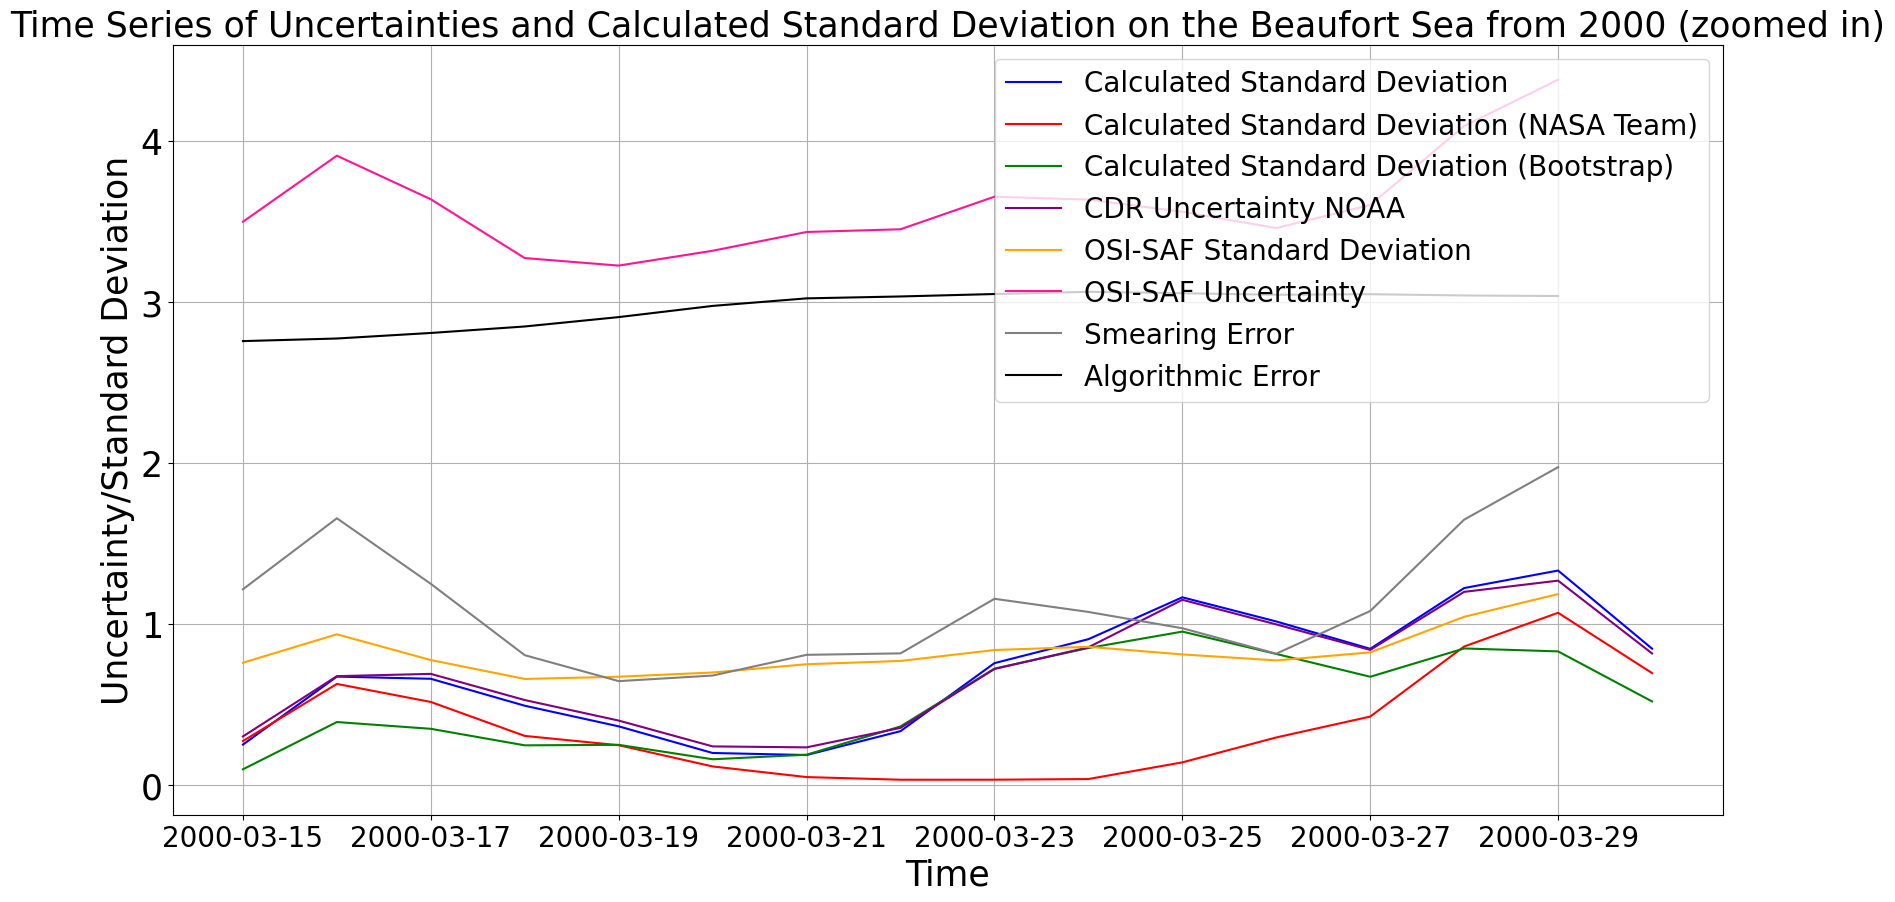

In [29]:
import pandas as pd
start_date = pd.to_datetime('2000-03-15')  # Define your start date
end_date = pd.to_datetime('2000-03-30')    # Define your end date

# Slicing the data for the zoomed-in plot
zoomed_time = time2000[(time2000 >= start_date) & (time2000 <= end_date)]
stdev_mean_2000_zoomed = stdev_mean_2000[(time2000 >= start_date) & (time2000 <= end_date)]
stdev_mean_nt_2000_zoomed = stdev_mean_nt_2000[(time2000 >= start_date) & (time2000 <= end_date)]
stdev_mean_bt_2000_zoomed = stdev_mean_bt_2000[(time2000 >= start_date) & (time2000 <= end_date)]
uncertainty_mean_noaa_2000_zoomed = uncertainty_mean_noaa_2000[(time2000 >= start_date) & (time2000 <= end_date)]
stdev_mean_osi_2000_zoomed = stdev_mean_osi_2000.sel(time=slice(start_date, end_date))
uncertainty_mean_osi_2000_zoomed = uncertainty_mean_osi_2000.sel(time=slice(start_date, end_date))
smearing_mean_2000_zoomed = smearing_mean_2000.sel(time=slice(start_date, end_date))
algo_mean_2000_zoomed = algo_mean_2000.sel(time=slice(start_date, end_date))

plt.figure(figsize=(20, 10))
plt.plot(zoomed_time, stdev_mean_2000_zoomed*100, label='Calculated Standard Deviation', color='blue')
plt.plot(zoomed_time, stdev_mean_nt_2000_zoomed*100, label='Calculated Standard Deviation (NASA Team)', color='red')
plt.plot(zoomed_time, stdev_mean_bt_2000_zoomed*100, label='Calculated Standard Deviation (Bootstrap)', color='green')
plt.plot(zoomed_time, uncertainty_mean_noaa_2000_zoomed*100, label='CDR Uncertainty NOAA', color='purple')
plt.plot(zoomed_time[:len(stdev_mean_osi_2000_zoomed)], stdev_mean_osi_2000_zoomed, label='OSI-SAF Standard Deviation', color='orange')
plt.plot(zoomed_time[:len(uncertainty_mean_osi_2000_zoomed):], uncertainty_mean_osi_2000_zoomed, label='OSI-SAF Uncertainty', color='deeppink')
plt.plot(zoomed_time[:len(smearing_mean_2000_zoomed):], smearing_mean_2000_zoomed, label='Smearing Error', color='grey')
plt.plot(zoomed_time[:len(algo_mean_2000_zoomed):], algo_mean_2000_zoomed, label='Algorithmic Error', color='black')
plt.xlabel('Time',fontsize=25)
plt.ylabel('Uncertainty/Standard Deviation',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=25)
plt.legend(fontsize=20, loc='upper right')
plt.title('Time Series of Uncertainties and Calculated Standard Deviation on the Beaufort Sea from 2000 (zoomed in)',fontsize=25)
plt.grid()
#plt.savefig('zoom_2000_all_unc_beaufort_mar.png')
plt.show()

#### SIC maps on 16 March 2000

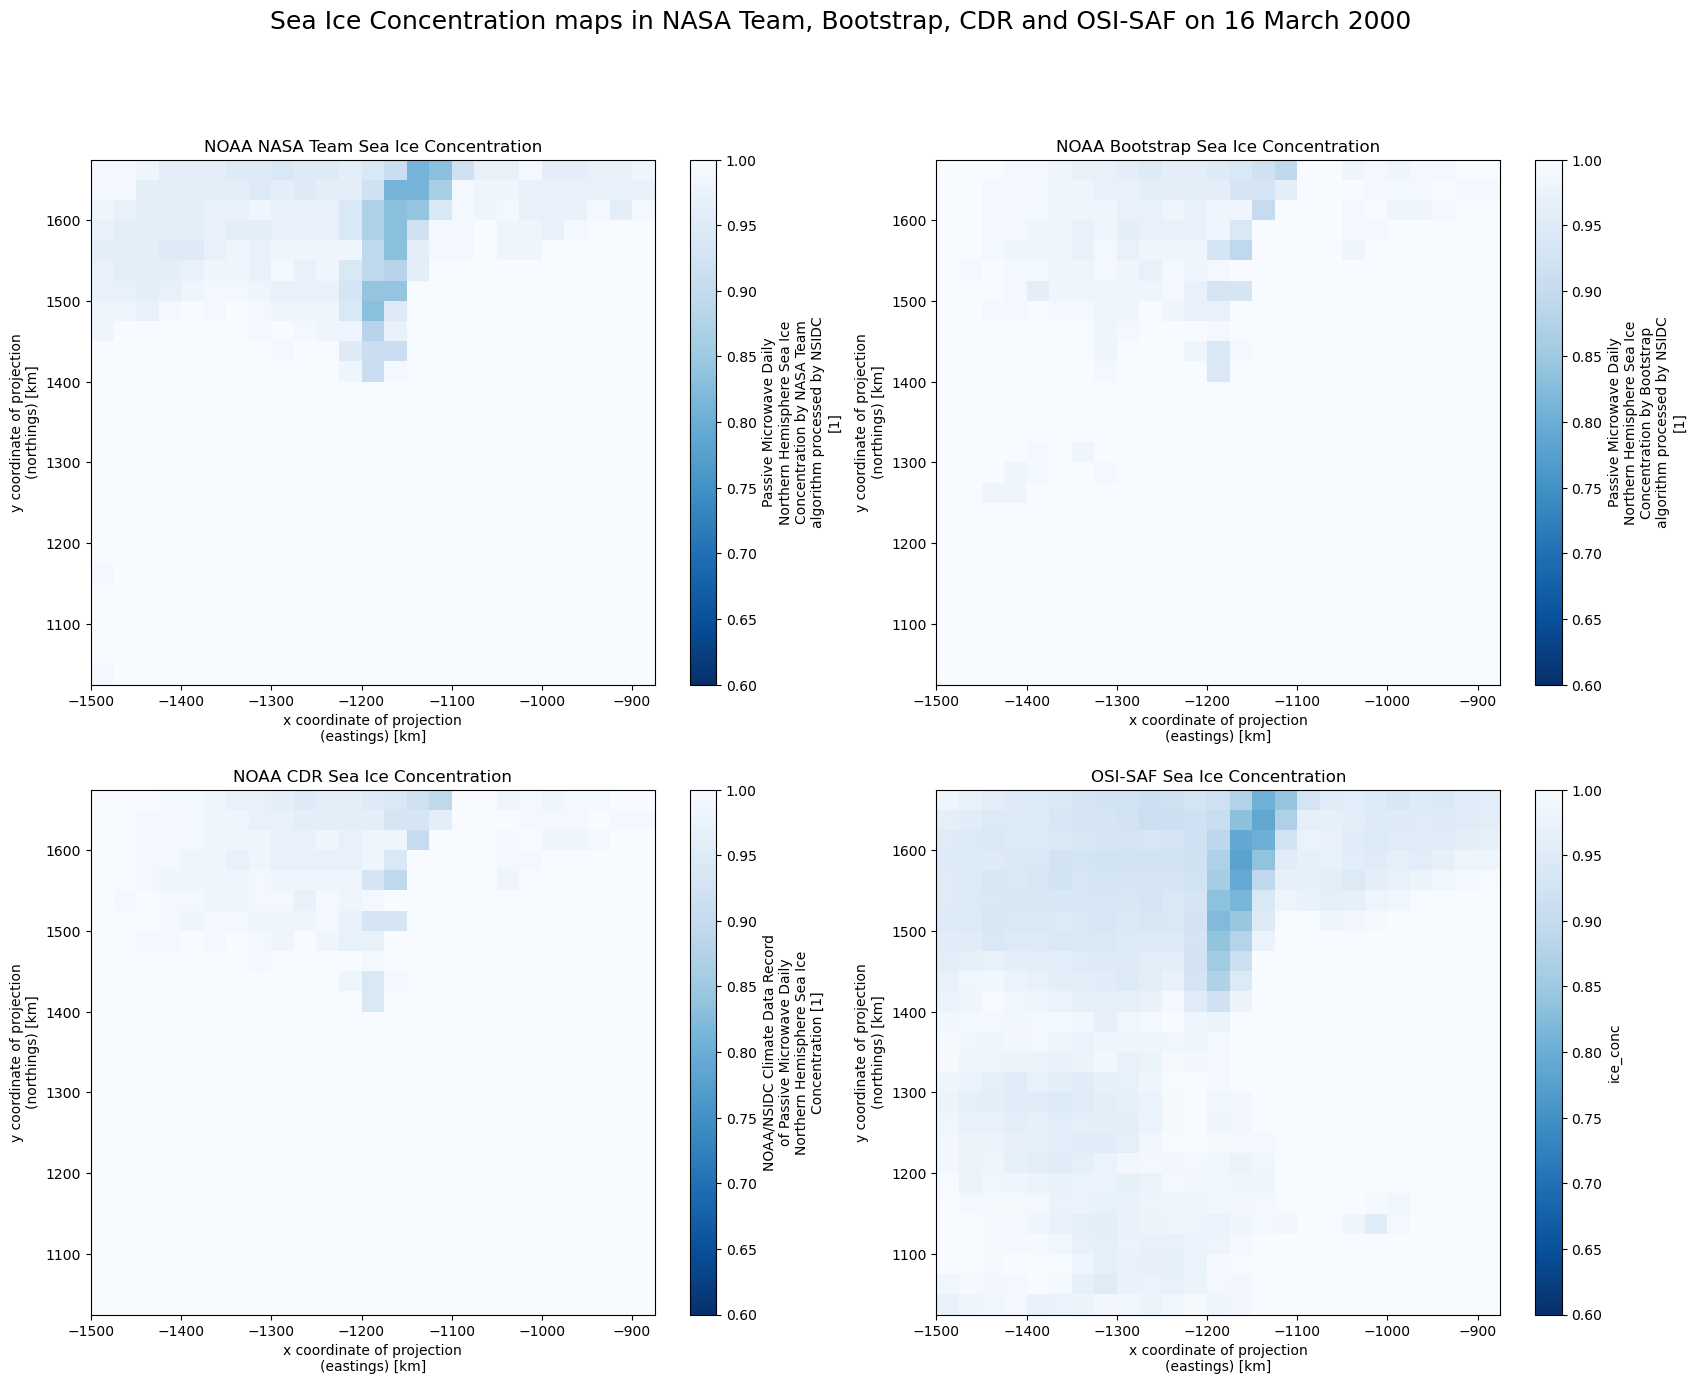

In [30]:
noaa2000_bt=noaa2000['nsidc_bt_seaice_conc'].isel(time=75)
noaa2000_nt=noaa2000['nsidc_nt_seaice_conc'].isel(time=75)
noaa2000_cdr=noaa2000['cdr_seaice_conc'].isel(time=75)
osi2000_sic=(osi2000['ice_conc']).isel(time=75)
custom_cmap = 'Blues_r'
vmin=0.6
vmax=1

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

noaa2000_nt.plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[0, 0])
axes[0, 0].set_title('NOAA NASA Team Sea Ice Concentration')

noaa2000_bt.plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[0, 1])
axes[0, 1].set_title('NOAA Bootstrap Sea Ice Concentration')

noaa2000_cdr.plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[1, 0])
axes[1, 0].set_title('NOAA CDR Sea Ice Concentration')

(osi2000_sic/100).plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[1, 1])
axes[1, 1].set_title('OSI-SAF Sea Ice Concentration')

fig.suptitle('Sea Ice Concentration maps in NASA Team, Bootstrap, CDR and OSI-SAF on 16 March 2000',fontsize=18)

#plt.savefig('16_03_2000_SICS.png')
plt.show()

#### SIC maps on 29 July 2000

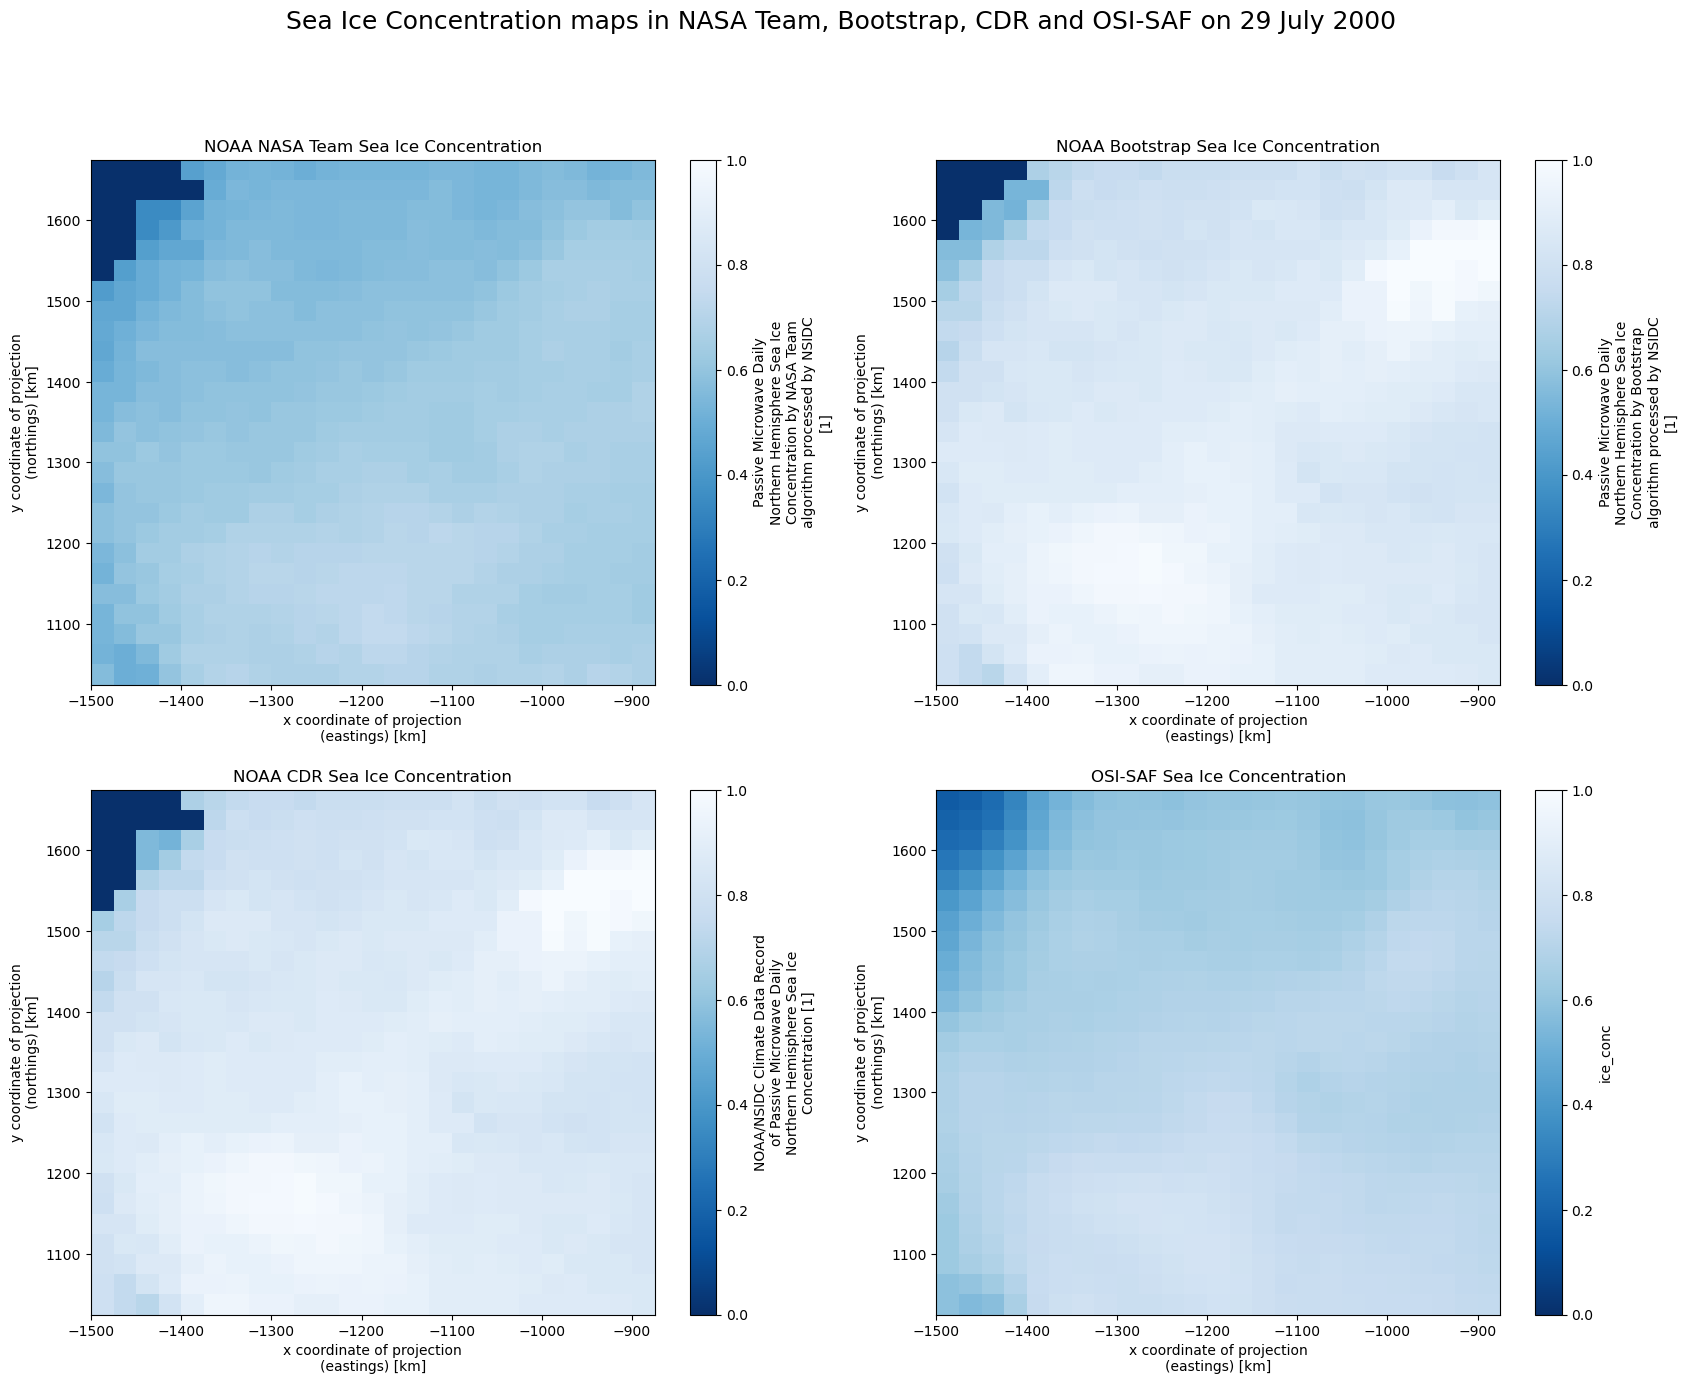

In [32]:
noaa2000_bt=noaa2000['nsidc_bt_seaice_conc'].isel(time=210)
noaa2000_nt=noaa2000['nsidc_nt_seaice_conc'].isel(time=210)
noaa2000_cdr=noaa2000['cdr_seaice_conc'].isel(time=210)
osi2000_sic=(osi2000['ice_conc']).isel(time=210)
custom_cmap = 'Blues_r'
vmin=0
vmax=1

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

noaa2000_nt.plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[0, 0])
axes[0, 0].set_title('NOAA NASA Team Sea Ice Concentration')

noaa2000_bt.plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[0, 1])
axes[0, 1].set_title('NOAA Bootstrap Sea Ice Concentration')

noaa2000_cdr.plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[1, 0])
axes[1, 0].set_title('NOAA CDR Sea Ice Concentration')

(osi2000_sic/100).plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[1, 1])
axes[1, 1].set_title('OSI-SAF Sea Ice Concentration')

fig.suptitle('Sea Ice Concentration maps in NASA Team, Bootstrap, CDR and OSI-SAF on 29 July 2000',fontsize=18)

#plt.savefig('29_07_2000_SICS.png')
plt.show()

#### Difference map of SIC between NASA Team and Bootstrap

Text(0.5, 1.0, 'Difference of NT & BS SIC on 29 July 2000')

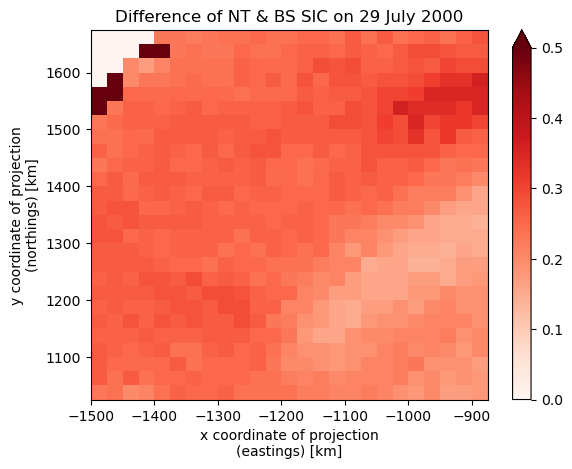

In [33]:
diff=noaa2000_bt-noaa2000_nt
diff.plot(cmap='Reds', vmin=0, vmax=0.5)
plt.title('Difference of NT & BS SIC on 29 July 2000')

#### Scatterplot between NASA Team & Bootstrap standard deviation and Smearing Error

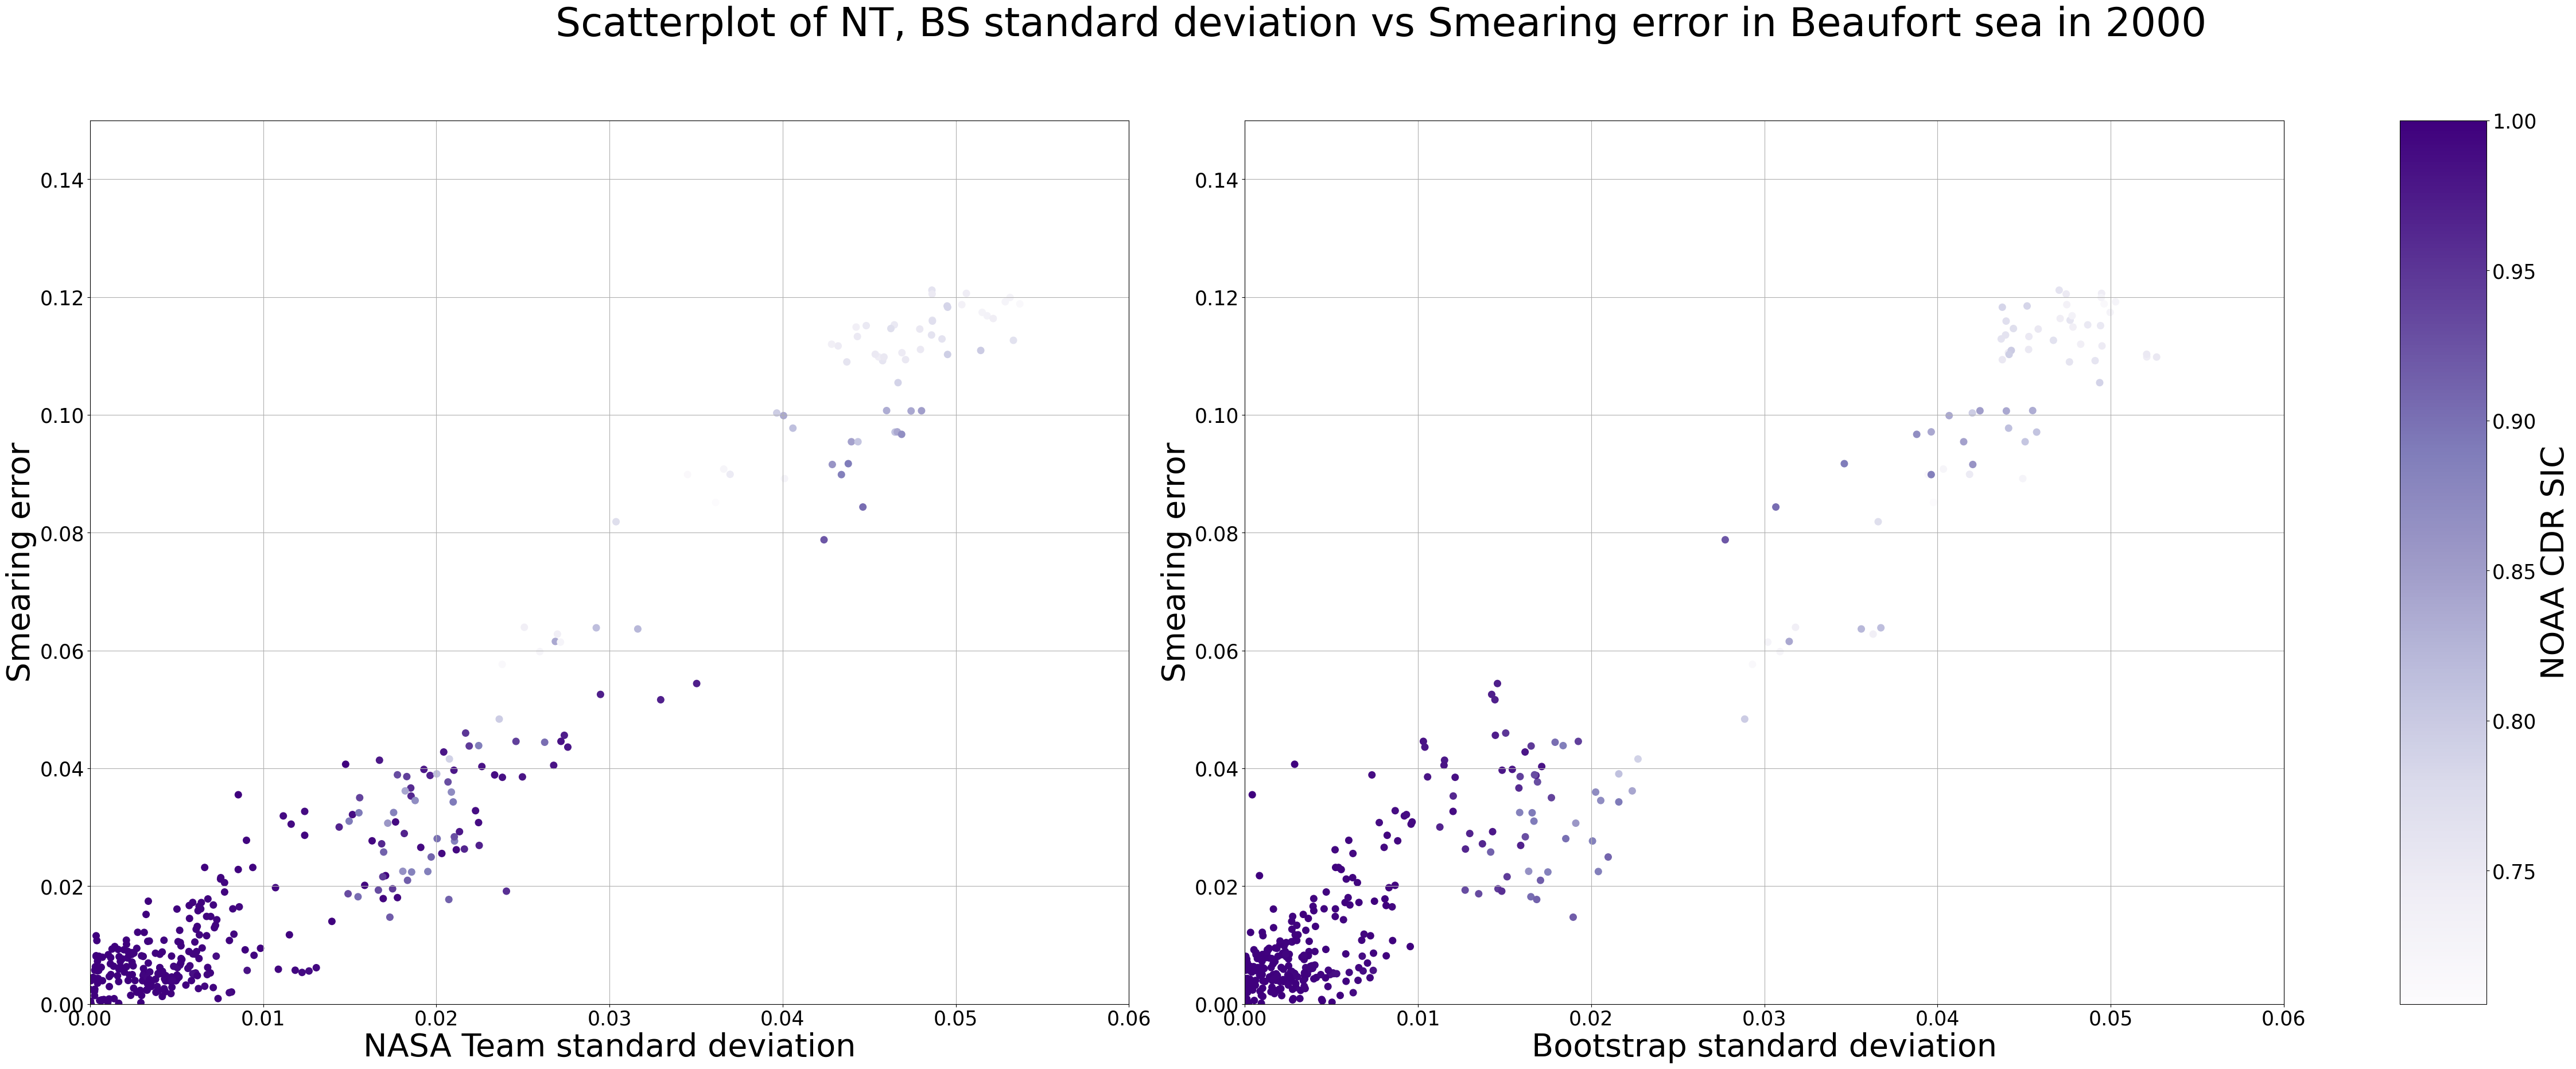

In [34]:
import matplotlib.gridspec as gridspec

smear_2000_mean=osi2000['smearing_standard_error'].mean(dim='yc')
smear_2000_mean=smear_2000_mean.mean(dim='xc')

noaa2000_unc_mean=noaa2000['stdev_of_cdr_seaice_conc'].mean(dim='xc')
noaa2000_unc_mean=noaa2000_unc_mean.mean(dim='yc')

noaa2000_cdr_mean=noaa2000['cdr_seaice_conc'].mean(dim='xc')
noaa2000_cdr_mean=noaa2000_cdr_mean.mean(dim='yc')

color_values = noaa2000_cdr_mean[:len(smear_2000_mean)]

noaa2000_nt_stdv_mean=noaa2000['standard_deviation_nt'].mean(dim='xc')
noaa2000_nt_stdv_mean=noaa2000_nt_stdv_mean.mean(dim='yc')

noaa2000_bt_stdv_mean=noaa2000['standard_deviation_bt'].mean(dim='xc')
noaa2000_bt_stdv_mean=noaa2000_bt_stdv_mean.mean(dim='yc')

# Create the scatter plot
fig = plt.figure(figsize=(60, 20))
gs = gridspec.GridSpec(1, 4, width_ratios=[6,6,0.5,0.9])

ax1 = fig.add_subplot(gs[0])
scatter1 = ax1.scatter(noaa2000_nt_stdv_mean[:len(smear_2000_mean)],smear_2000_mean/100, c=color_values, cmap='Purples', s=70)
ax1.set_xlabel('NASA Team standard deviation', fontsize=40)
ax1.set_ylabel('Smearing error', fontsize=40)
ax1.tick_params(axis='both', which='major', labelsize=25)
ax1.set_ylim(0.0, 0.15)
ax1.set_xlim(0.0, 0.06)
plt.grid()

ax2 = fig.add_subplot(gs[1])
scatter2 = ax2.scatter(noaa2000_bt_stdv_mean[:len(smear_2000_mean)], smear_2000_mean/100, c=color_values, cmap='Purples', s=70)
ax2.set_xlabel('Bootstrap standard deviation', fontsize=40)
ax2.set_ylabel('Smearing error', fontsize=40)
ax2.tick_params(axis='both', which='major', labelsize=25)
ax2.set_ylim(0.0, 0.15)
ax2.set_xlim(0.0, 0.06)
plt.grid()

cbar_ax3 = fig.add_subplot(gs[2])
cbar3 = plt.colorbar(scatter2, cax=cbar_ax3)
cbar3.set_label('NOAA CDR SIC', fontsize=40)
cbar3.ax.tick_params(labelsize=25)

plt.suptitle('Scatterplot of NT, BS standard deviation vs Smearing error in Beaufort sea in 2000', fontsize=50)
#plt.savefig('Scatterplot_BS_NT_NOAA_vs_smear_2000.png')
plt.show()

#### Scatterplot between OSI-SAF SIC and Smearing/ Algorithmic error on 2015

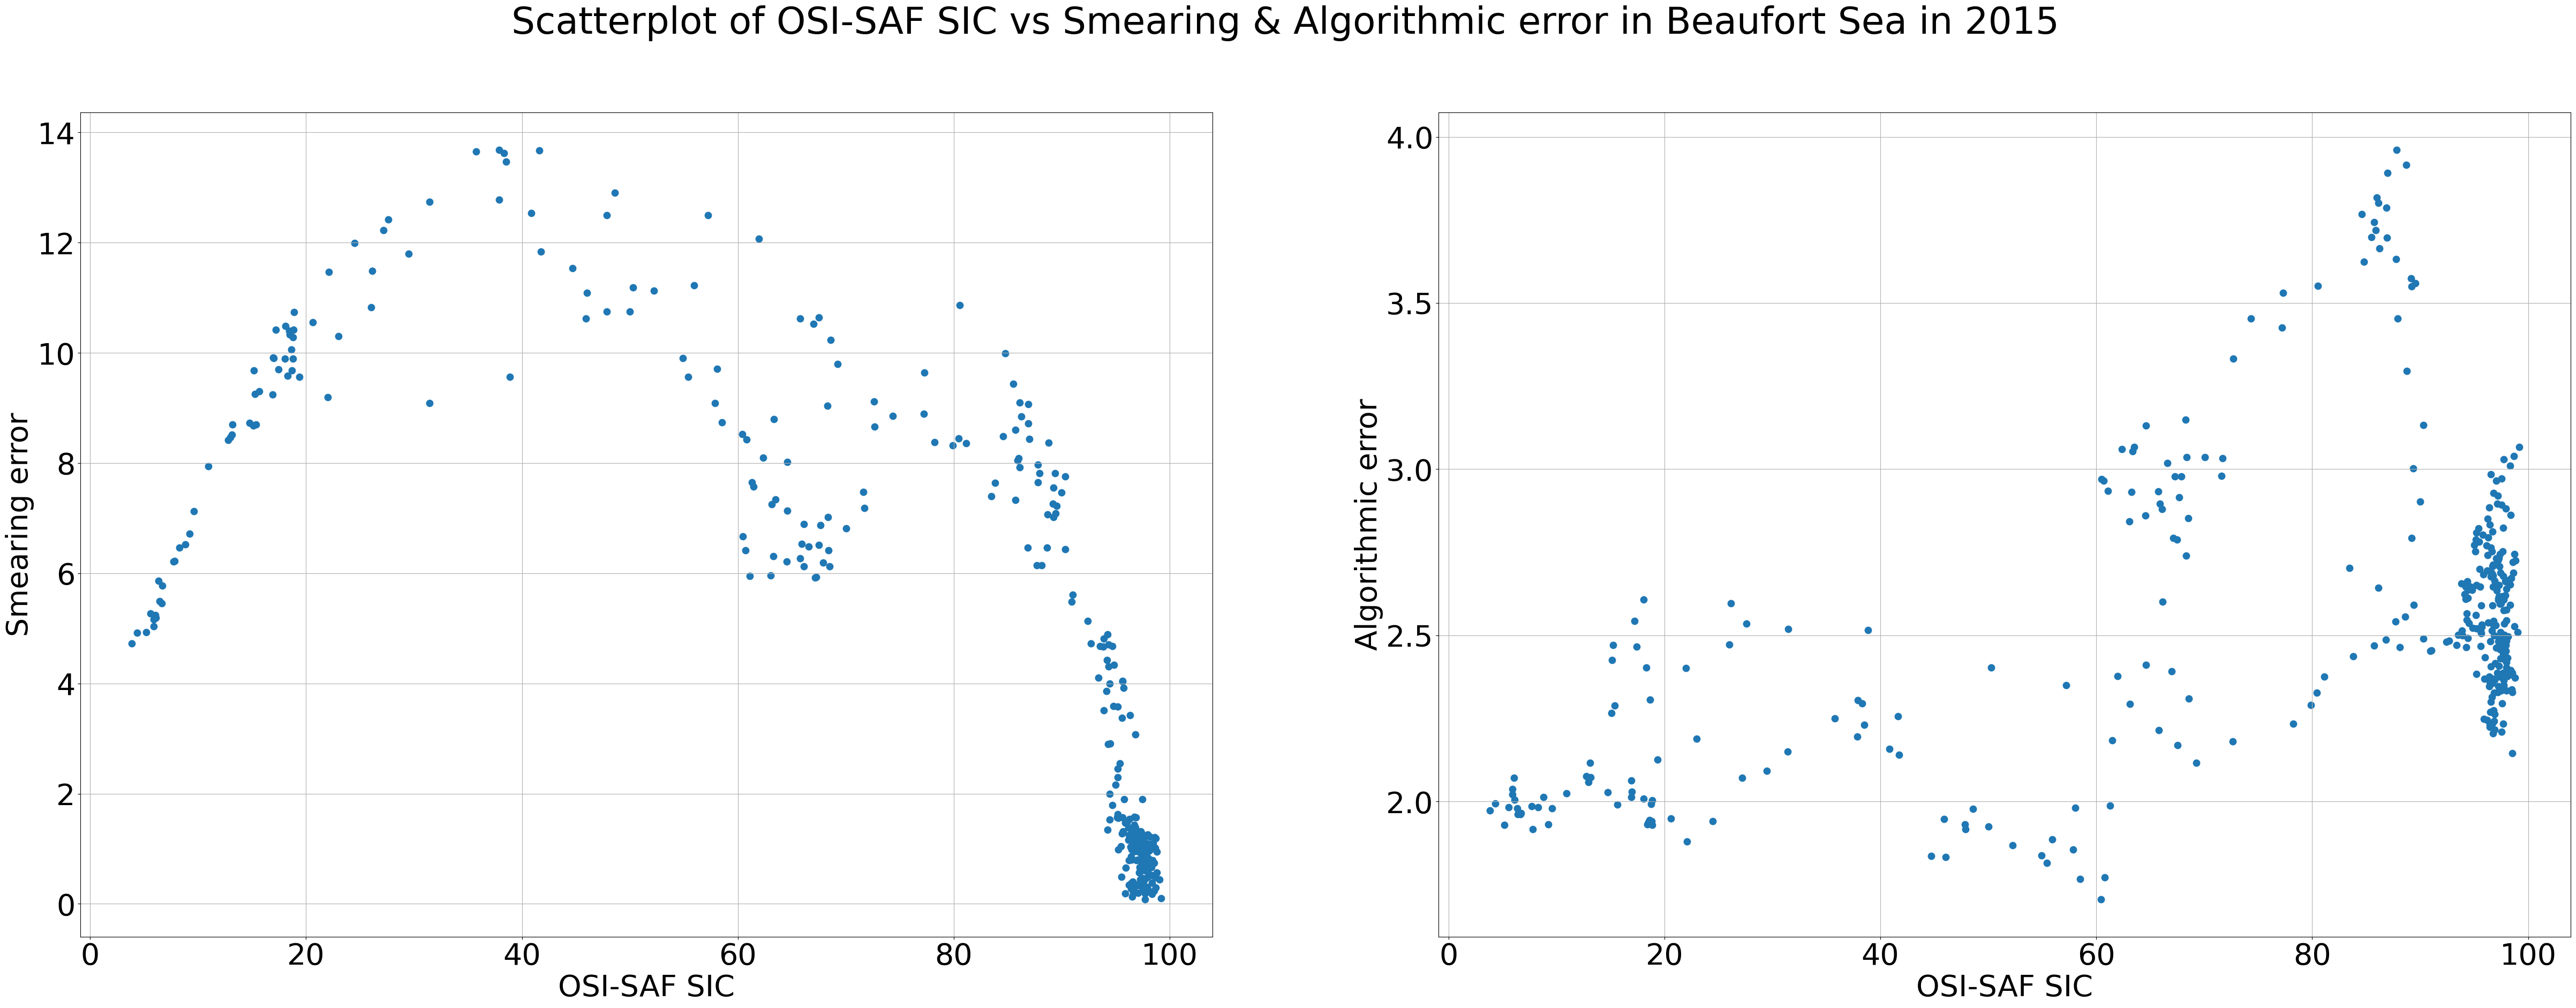

In [35]:
import matplotlib.gridspec as gridspec

osi2015_sic_mean=osi2015['ice_conc'].mean(dim='xc')
osi2015_sic_mean=osi2015_sic_mean.mean(dim='yc')

#color_values = osi2015_sic_mean

smear_2015_mean=osi2015['smearing_standard_error'].mean(dim='yc')
smear_2015_mean=smear_2015_mean.mean(dim='xc')

algo_2015_mean=osi2015['algorithm_standard_error'].mean(dim='yc')
algo_2015_mean=algo_2015_mean.mean(dim='xc')

# Create the scatter plot
fig = plt.figure(figsize=(60, 20))
gs = gridspec.GridSpec(1, 2, width_ratios=[7,7])

ax1 = fig.add_subplot(gs[0])
scatter1 = ax1.scatter(osi2015_sic_mean, smear_2015_mean, s=80)
ax1.set_ylabel('Smearing error', fontsize=40)
ax1.set_xlabel('OSI-SAF SIC', fontsize=40)
ax1.tick_params(axis='both', which='major', labelsize=40)
plt.grid()

ax2 = fig.add_subplot(gs[1])
scatter2 = ax2.scatter(osi2015_sic_mean, algo_2015_mean, s=80)
ax2.set_xlabel('OSI-SAF SIC', fontsize=40)
ax2.set_ylabel('Algorithmic error', fontsize=40)
ax2.tick_params(axis='both', which='major', labelsize=40)
plt.grid()

plt.suptitle('Scatterplot of OSI-SAF SIC vs Smearing & Algorithmic error in Beaufort Sea in 2015', fontsize=50)
#plt.savefig('Scatterplot of OSI-SAF Smearing & Algorithmic error vs SIC in Beaufort Sea in 2015.png')
plt.show()

#### Scatterplot between NASA Team & Bootstrap SIC and NOAA Uncertainty on 1995

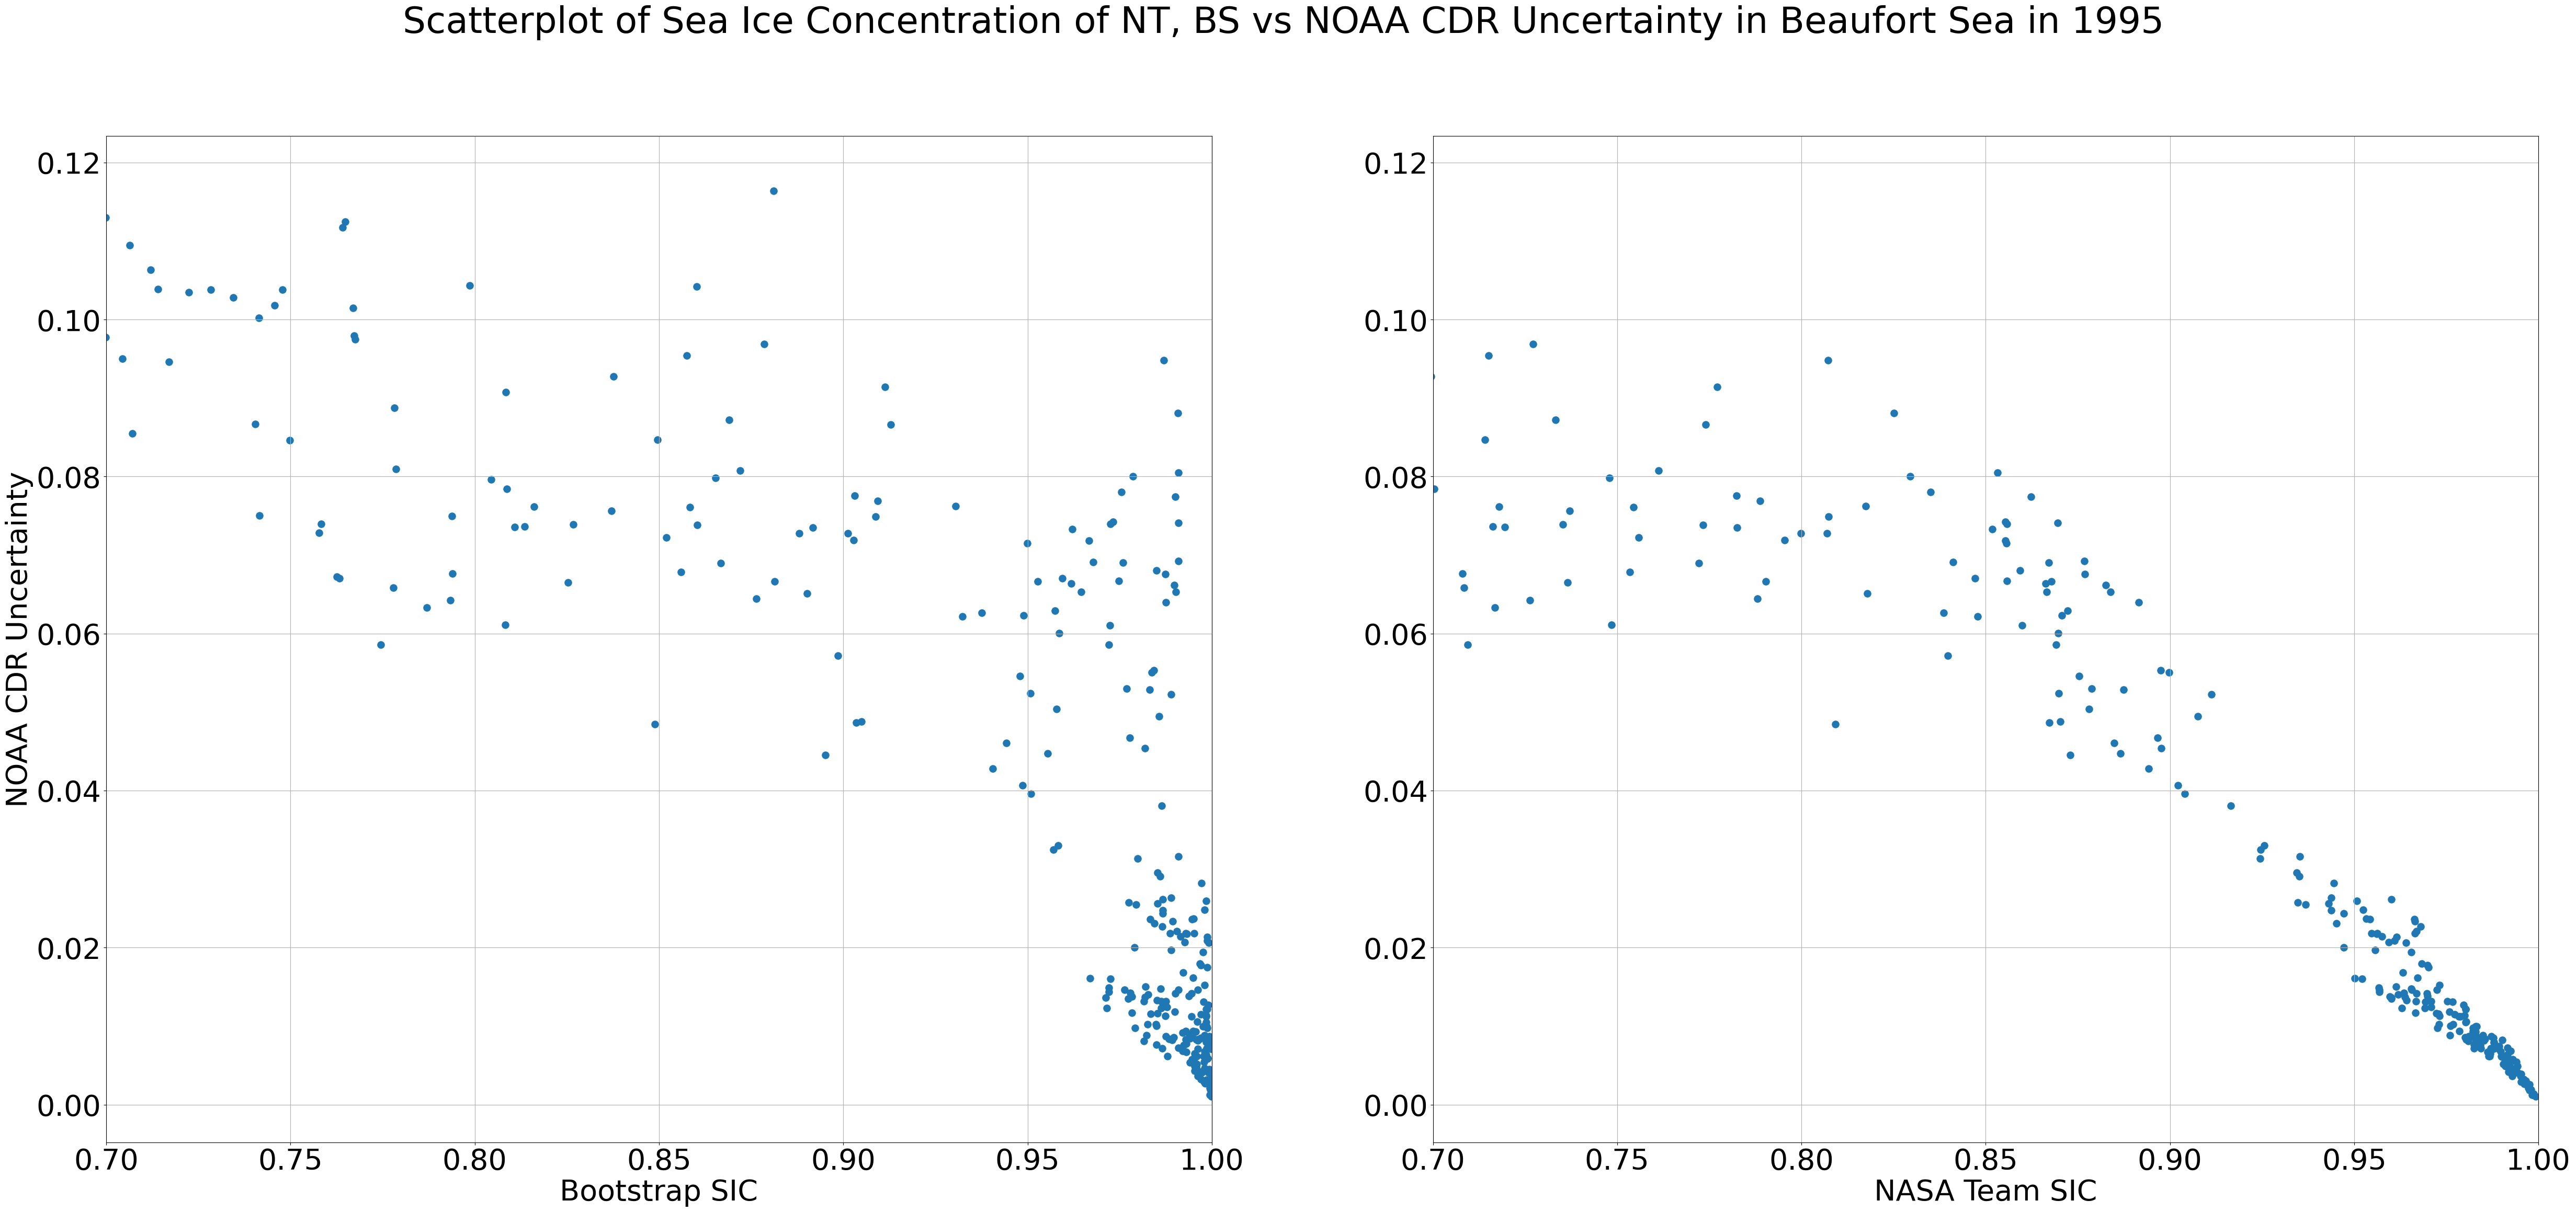

In [37]:
import matplotlib.gridspec as gridspec

noaa1995_cdr_mean=noaa1995['cdr_seaice_conc'].mean(dim='yc')
noaa1995_cdr_mean=noaa1995_cdr_mean.mean(dim='xc')

noaa1995_unc_mean=noaa1995['stdev_of_cdr_seaice_conc'].mean(dim='xc')
noaa1995_unc_mean=noaa1995_unc_mean.mean(dim='yc')

noaa1995_bt_mean=noaa1995['nsidc_bt_seaice_conc'].mean(dim='xc')
noaa1995_bt_mean=noaa1995_bt_mean.mean(dim='yc')

noaa1995_nt_mean=noaa1995['nsidc_nt_seaice_conc'].mean(dim='xc')
noaa1995_nt_mean=noaa1995_nt_mean.mean(dim='yc')

color_values = noaa1995_cdr_mean

# Create the scatter plot
fig = plt.figure(figsize=(60, 25))
gs = gridspec.GridSpec(1, 2, width_ratios=[6,6])

ax1 = fig.add_subplot(gs[0])
scatter1 = ax1.scatter(noaa1995_bt_mean, noaa1995_unc_mean, label='Bootstrap SIC', s=90)
ax1.set_ylabel('NOAA CDR Uncertainty', fontsize=40)
ax1.set_xlabel('Bootstrap SIC', fontsize=40)
ax1.tick_params(axis='both', which='major', labelsize=40)
ax1.set_xlim(0.7, 1.0)
plt.grid()

ax2 = fig.add_subplot(gs[1])
scatter2 = ax2.scatter(noaa1995_nt_mean,noaa1995_unc_mean, label='NASA Team SIC', s=90)
#ax2.set_ylabel('NOAA CDR Uncertainty', fontsize=40)
ax2.set_xlabel('NASA Team SIC', fontsize=40)
ax2.tick_params(axis='both', which='major', labelsize=40)
ax2.set_xlim(0.7, 1.0)
plt.grid()

plt.suptitle('Scatterplot of Sea Ice Concentration of NT, BS vs NOAA CDR Uncertainty in Beaufort Sea in 1995', fontsize=50)
#plt.savefig('Scatterplot_BS_NT_diff_1995.png')
plt.show()